# Import Libs 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import chi2_contingency
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Reading Data 

In [4]:
dt=pd.read_csv('Data/HRDataset_v14.csv')

# Data Profilling 

In [6]:
def data_Specs(DS):
    print("Initial Specs on your data =================== \n")
    print("Data Shape: ", DS.shape)
    print("\n---------------------------------------------\n")
    s = (DS.dtypes == 'object')
    Cat_cols = list(s[s].index) 
    print("Category Columns (",len(Cat_cols),") : \n",Cat_cols)
    print("\n---------------------------------------------\n")   
    s = (DS.dtypes != 'object')
    Nums_cols = list(s[s].index) 
    
    print("Numeric Columns (",len(Nums_cols),") : \n",Nums_cols)
    print("\n---------------------------------------------\n")
    print("Null Ratio per Column: \n")
    print(DS.isnull().sum()/len(DS)*100)
    print("\n---------------------------------------------\n")
    print("Summary Statistic for numeric columns: \n")
    print(DS.describe())
    print("\n---------------------------------------------\n")

In [7]:
data_Specs(dt)

Initial Specs on your data =================== 

Data Shape:  (311, 36)

---------------------------------------------

Category Columns ( 18 ) : 
 ['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']

---------------------------------------------

Numeric Columns ( 18 ) : 
 ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']

---------------------------------------------

Null Ratio per Column: 

Employee_Name                  0.000000
EmpID                          0.000000
MarriedID                      0.000000
MaritalStatusID                0.000

In [8]:
dt.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Check Percentage of Nulls

In [11]:
dt.isnull().sum()/len(dt)*100

Employee_Name                  0.000000
EmpID                          0.000000
MarriedID                      0.000000
MaritalStatusID                0.000000
GenderID                       0.000000
EmpStatusID                    0.000000
DeptID                         0.000000
PerfScoreID                    0.000000
FromDiversityJobFairID         0.000000
Salary                         0.000000
Termd                          0.000000
PositionID                     0.000000
Position                       0.000000
State                          0.000000
Zip                            0.000000
DOB                            0.000000
Sex                            0.000000
MaritalDesc                    0.000000
CitizenDesc                    0.000000
HispanicLatino                 0.000000
RaceDesc                       0.000000
DateofHire                     0.000000
DateofTermination             66.559486
TermReason                     0.000000
EmploymentStatus               0.000000


# Checking Duplicates

In [13]:
duplicates = dt[dt.duplicated()]

if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


# Checking for Outliers

In [15]:
dt.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


# Generate New Data 

In [17]:
# Function to generate random date within a range
def random_date(start, end):
    return (start + timedelta(days=random.randint(0, (end - start).days))).strftime('%m/%d/%Y')

# Generate more rows based on existing patterns
def generate_more_rows(df, n):
    new_rows = []
    max_empid = df['EmpID'].max()

    for _ in range(n):
        row = df.sample().to_dict(orient='records')[0]
        
        # Modify Employee ID and Name
        max_empid += 1
        row['EmpID'] = max_empid
        row['Employee_Name'] = f"NewName_{max_empid}"

        # Slightly vary salary, EngagementSurvey, Absences
        row['Salary'] = row['Salary'] * random.uniform(0.9, 1.1)
        row['EngagementSurvey'] = round(random.uniform(3.1, 5.0), 2)
        row['Absences'] = random.randint(0, 19)
        
        # Modify date within a realistic range
        row['LastPerformanceReview_Date'] = random_date(datetime(2018, 1, 1), datetime(2019, 12, 31))
        
        new_rows.append(row)

    return pd.DataFrame(new_rows)

# Generate 689 more rows to reach 1000
new_data = generate_more_rows(dt, 689)

# Combine with the original data
df_final = pd.concat([dt, new_data], ignore_index=True)

print(df_final.shape)


(1000, 36)


## To check the generated data is correct 

In [19]:
dt = df_final 

# To save extanded data

In [21]:
dt.to_csv("new_data.csv",index=False)

# Cleaning Data 
* convert Date columns to datetime datatype
* convert Termd column to categorical datatype
* define non analytic columns=[ 'EmpID', 'Employee_Name','MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'ManagerName', 'ManagerID','Zip', 'FromDiversityJobFairID']
*  Impute Outliers of date of birth based on Statistical Data 

In [23]:
dt.DOB = pd.to_datetime(dt['DOB'])
dt.DateofHire = pd.to_datetime(dt["DateofHire"])
dt.DateofTermination = pd.to_datetime(dt.DateofTermination)
dt.LastPerformanceReview_Date = pd.to_datetime(dt.LastPerformanceReview_Date)


dt['Termd'] = dt['Termd'].astype('category')

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3009393997.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt.DOB = pd.to_datetime(dt['DOB'])


In [24]:
# Assuming df is your DataFrame
today = datetime.today().date()
#future_birthdates = dt[dt['DOB'].dt.date > today]
median_year = dt[dt['DOB'].dt.date <= today]['DOB'].apply(lambda x: x.year).median()
dt.loc[dt['DOB'].dt.date > today, 'DOB'] = dt['DOB'].apply(lambda dob: dob.replace(year=int(median_year)))

In [25]:
non_analytic_columns=[ 'EmpID', 'Employee_Name','MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'ManagerName', 'ManagerID','Zip', 'FromDiversityJobFairID']

# Preprocessing data
### Update the DataFrame by creating new columns and modifying existing values.
* create a new columns for EngagementSurvey, EmpSatisfaction to be EngagementSurvey_Status, EmpSatisfaction_Status respectivly  by labels ['unsatisfy', 'neutral', 'satisfy']
*  Update 'EmploymentStatus' Column 
      *  'Terminated for Cause': 'Terminated',
      * 'Voluntarily Terminated': 'Resigned'    

In [27]:
def update_employee_data(df):
    """
    Update the DataFrame by creating new columns and modifying existing values.

    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing employee data.
    
    Returns:
    --------
    pd.DataFrame
        Updated DataFrame with new columns and modified employment status.
    """
    
    # 1. Create the 'EngagementSurvey_Status' Column (adjusted bins from 0 to 5)
    df['EngagementSurvey_Status'] = pd.cut(df['EngagementSurvey'], 
                                           bins=[0, 2, 3, 5],  # Bins for values 0-2, 3, 4-5
                                           labels=['unsatisfy', 'neutral', 'satisfy'],
                                           include_lowest=True)
    
    # 2. Create the 'EmpSatisfaction_Status' Column (similarly adjusted)
    df['EmpSatisfaction_Status'] = pd.cut(df['EmpSatisfaction'], 
                                          bins=[0, 2, 3, 5],  # Same bin structure
                                          labels=['unsatisfy', 'neutral', 'satisfy'],
                                          include_lowest=True)

    # 3. Update 'EmploymentStatus' Column
    df['EmploymentStatus'] = df['EmploymentStatus'].replace({
        'Terminated for Cause': 'Terminated',
        'Voluntarily Terminated': 'Resigned'
    })
    
    return df


In [28]:

# Function to calculate age
def calculate_age(df):
    # Current date
    current_date = pd.to_datetime(datetime.now())

    # Calculate age in years
    df['Age'] = ((current_date - df['DOB']).dt.days / 365.25).astype(int)  # Use 365.25 to account for leap years

    return df


In [29]:

def calculate_months_of_employment(df):
    # Current date
    current_date = pd.to_datetime(datetime.now())

    # Initialize MonthsOfEmployment with NaN
    df['MonthsOfEmployment'] = np.nan

    # Calculate months of employment
    for index, row in df.iterrows():
        hire_date = row['DateofHire']
        termination_date = row['DateofTermination']

        if pd.isnull(termination_date):  # Still employed
            if pd.isnull(hire_date):
                df.at[index, 'MonthsOfEmployment'] = np.nan  # Hire date is also null
            else:
                # Calculate from DateofHire to now
                months = (current_date - hire_date).days / 30.44
                df.at[index, 'MonthsOfEmployment'] = round(months)  # Round to nearest month

        else:  # Employee has been terminated
            if pd.isnull(hire_date):
                df.at[index, 'MonthsOfEmployment'] = np.nan  # Hire date is null
            else:
                # Calculate from DateofHire to DateofTermination
                months = (termination_date - hire_date).days / 30.44
                df.at[index, 'MonthsOfEmployment'] = round(months)  # Round to nearest month

    # Convert to integer, handling NaN safely
    df['MonthsOfEmployment'] = df['MonthsOfEmployment'].fillna(0).astype(int)

    return df




In [30]:

# Define categories based on the specific TermReason values
def classify_term_reason(text):
    # Lowercase for consistency
    text = text.lower()
    
    # Natural reasons (neutral separations)
    natural_reasons = [
        'retiring', 'military', 'maternity leave',  'return to school',
        'relocation out of area', 'n/a-stillemployed'
    ]
    
    # Positive reasons (career progress, voluntary moves)
    positive_reasons = [
        'career change'
    ]
    
    # Negative reasons (involuntary or problematic)
    negative_reasons = [
        'unhappy', 'hours', 'attendance', 'no-call, no-show', 'performance', 'did not return', 'more money',  'another position'
        'gross misconduct', 'medical issues', 'learned that he is a gangster', 'fatal attraction'
    ]
    
    # Classify based on custom rules
    if any(kw in text for kw in natural_reasons):
        return 'Natural'
    elif any(kw in text for kw in positive_reasons):
        return 'Positive'
    elif any(kw in text for kw in negative_reasons):
        return 'Negative'
    else:
        return 'Natural'  # Defaulting to "Natural" for unknown or ambiguous cases



In [31]:
# Apply the function
dt = update_employee_data(dt)
dt = calculate_age(dt)
dt = calculate_months_of_employment(dt)
# Apply the classification function to TermReason column
dt['TermReason_category'] = dt['TermReason'].apply(classify_term_reason)

# Unvariant Analysis

In [33]:
def univariate_analysis(df, column, non_analytic_columns=None, display_plots=True):
    """
    Perform univariate analysis for a given column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing the data.
    column : str
        The column to analyze.
    non_analytic_columns : list, optional
        List of columns that should be skipped from analysis (e.g., ID columns).
    display_plots : bool, optional
        If True, displays visualizations (histogram, KDE, boxplot, etc.).
    
    Returns:
    --------
    dict
        Dictionary containing summary statistics and insights.
    """

    # Check if the column exists
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the dataframe.")
    
    # Handle non-analytic columns (e.g., ID columns)
    non_analytic_columns = non_analytic_columns or []
    if column.lower().endswith("id") or column in non_analytic_columns:
        return {f"'{column}' is identified as a non-analytic column (e.g., ID)"}
    
    # Extract the column data
    data = df[column]
    
    # Initialize the result dictionary
    result = {}

    # 1. Handle Numeric Columns
    if pd.api.types.is_numeric_dtype(data):
        result['type'] = 'numeric'
        result['count'] = data.count()
        result['mean'] = data.mean()
        result['median'] = data.median()
        result['mode'] = data.mode()[0] if not data.mode().empty else None
        result['std'] = data.std()
        result['variance'] = data.var()
        result['min'] = data.min()
        result['max'] = data.max()
        
        # Outlier Detection using IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result['outliers'] = data[(data < lower_bound) | (data > upper_bound)].tolist()

        # Visualization for Numeric Columns
        if display_plots:
            plt.figure(figsize=(14, 6))

            # Histogram + KDE
            plt.subplot(1, 2, 1)
            sns.histplot(data, kde=True, color='blue')
            plt.title(f'Histogram & KDE of {column}')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data, color='blue')
            plt.title(f'Boxplot of {column}')

            plt.tight_layout()
            plt.show()

    # 2. Handle Categorical Columns
    elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
        result['type'] = 'categorical'
        result['count'] = data.count()
        result['unique'] = data.nunique()
        result['mode'] = data.mode()[0] if not data.mode().empty else None
        result['top'] = data.value_counts().idxmax()  # Most frequent category
        result['freq'] = data.value_counts().max()    # Frequency of the most frequent category
        
        # Visualization for Categorical Columns
        if display_plots:
            plt.figure(figsize=(10, 5))
            
            # Countplot
            sns.countplot(y=data, palette=['#1f77b4'] )
            plt.title(f'Countplot of {column}')
            plt.tight_layout()
            plt.show()

    # 3. Handle Datetime Columns
    elif pd.api.types.is_datetime64_any_dtype(data):
        result['type'] = 'datetime'
        result['min'] = data.min()
        result['max'] = data.max()

        # Extract temporal features like year, month, day
        result['year_range'] = f"{data.dt.year.min()} - {data.dt.year.max()}"
        result['month_mode'] = data.dt.month.mode()[0]
        result['day_mode'] = data.dt.day.mode()[0]

        # Visualization for Datetime Columns
        if display_plots:
            plt.figure(figsize=(14, 6))

            # Line Plot (Time Trend)
            plt.subplot(1, 2, 1)
            data_counts = data.value_counts().sort_index()
            data_counts.plot()
            plt.title(f'Time Trend of {column}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')

            # Histogram (Date Distribution)
            plt.subplot(1, 2, 2)
            sns.histplot(data, kde=False)
            plt.title(f'Histogram of {column}')
            plt.xlabel('Date')

            plt.tight_layout()
            plt.show()

    else:
        result['type'] = 'unknown'
        return {f"Data type of column '{column}' is not recognized for univariate analysis."}

    return result


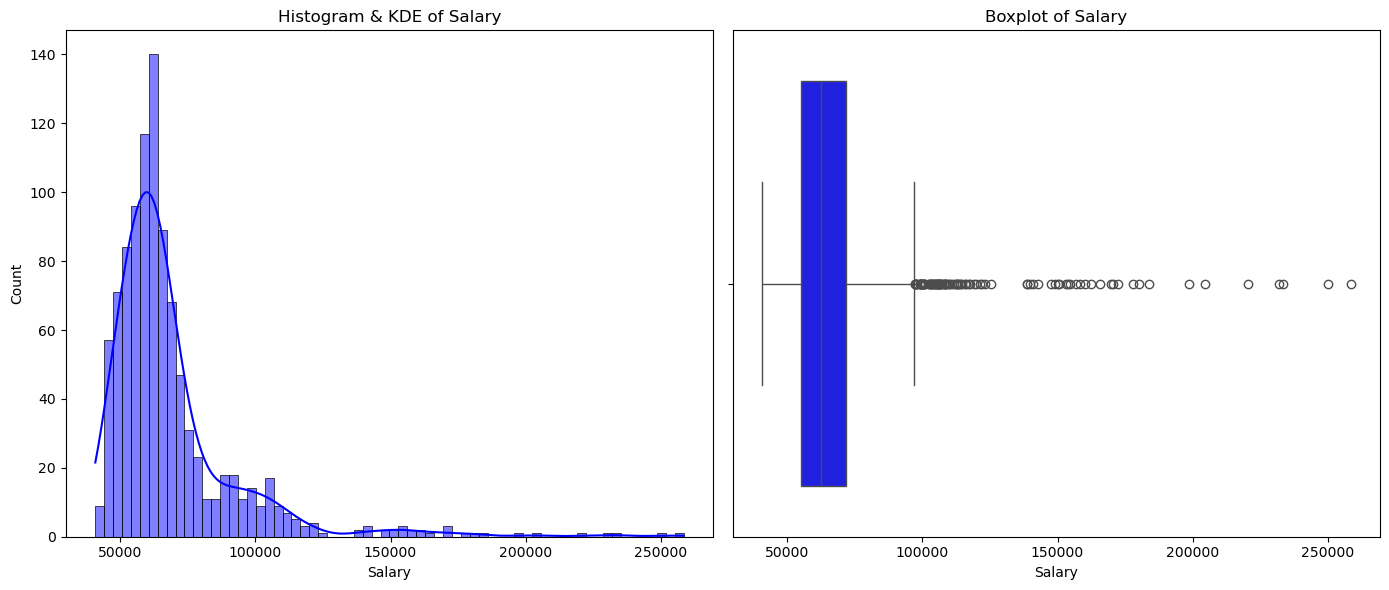

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


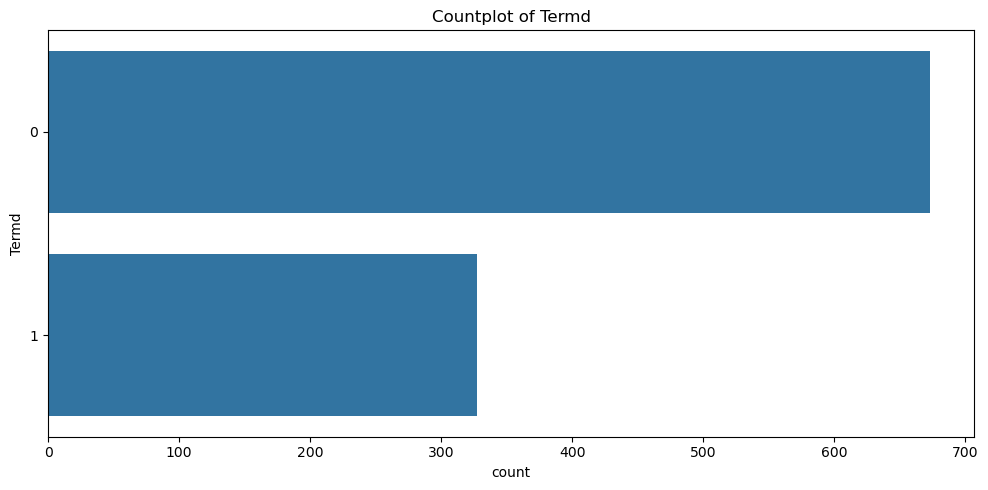

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


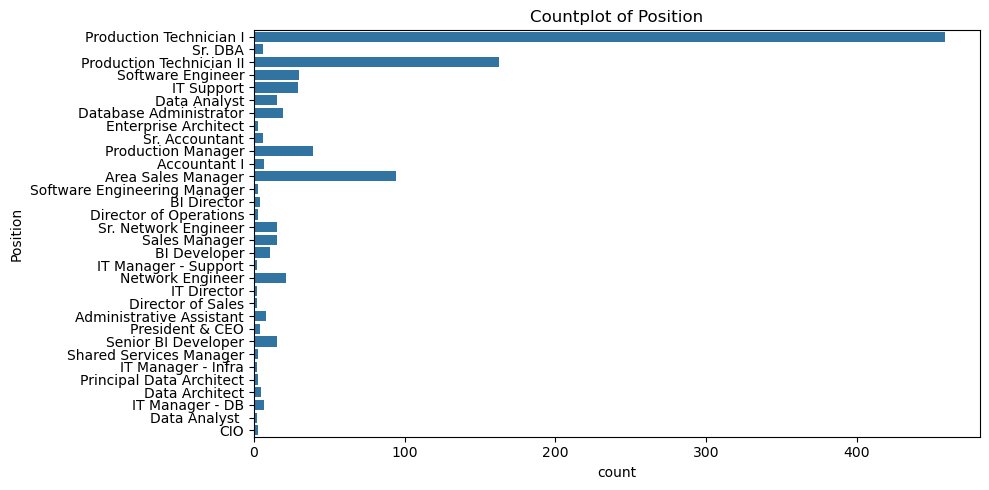

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


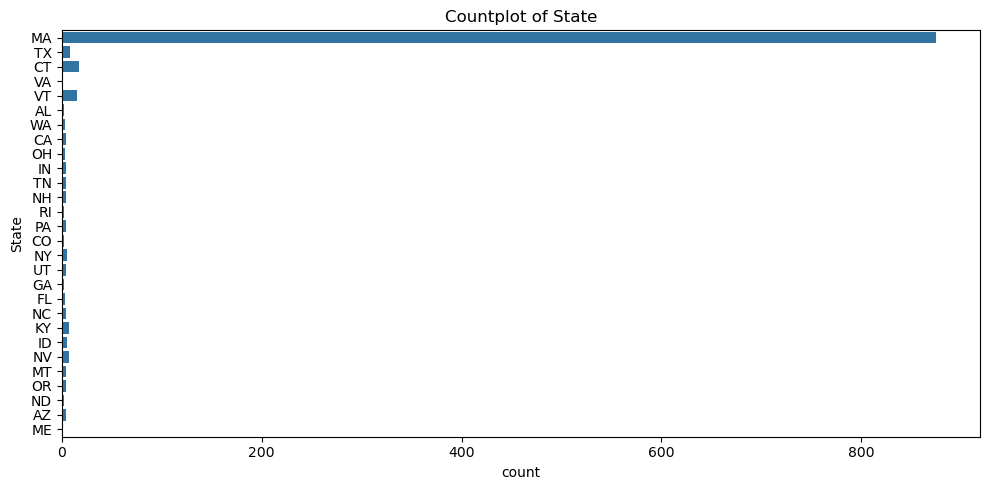

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


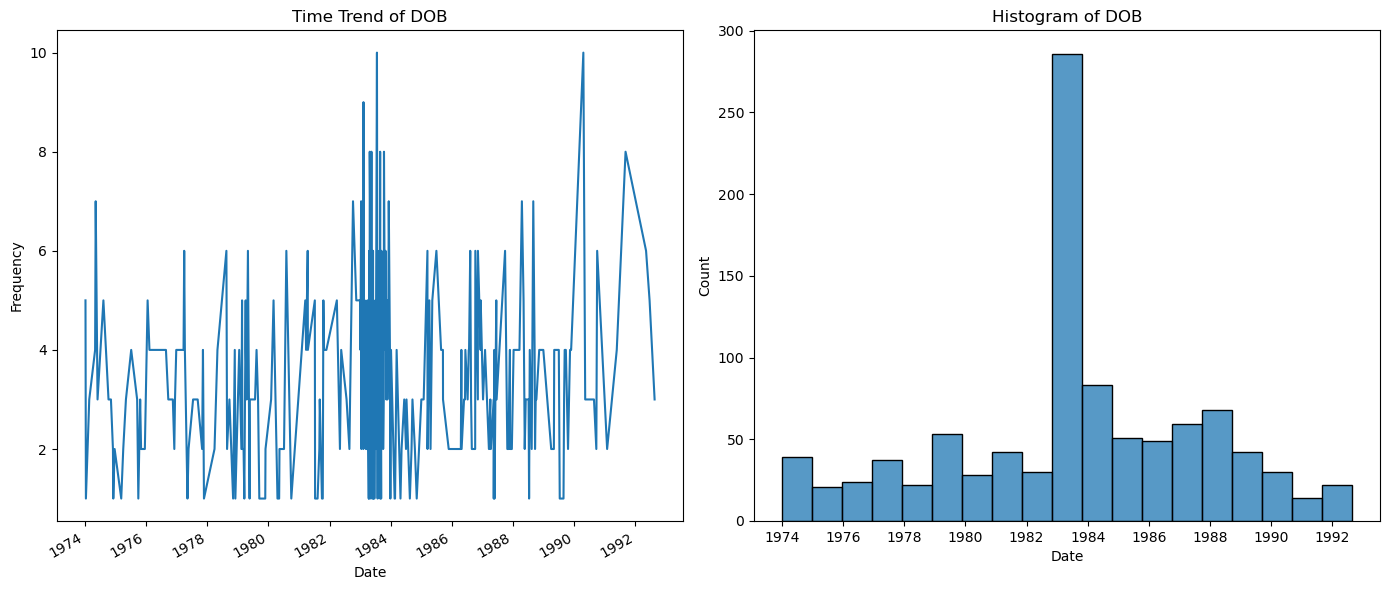

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


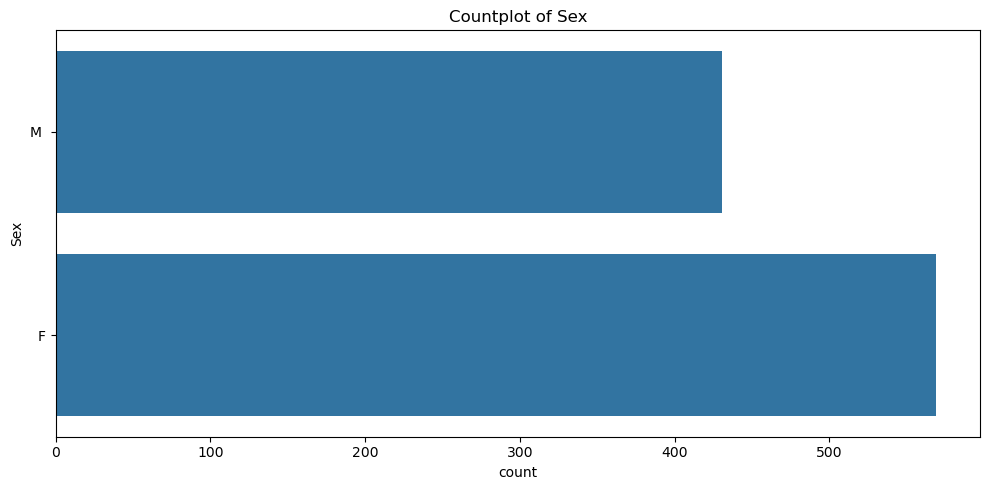

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


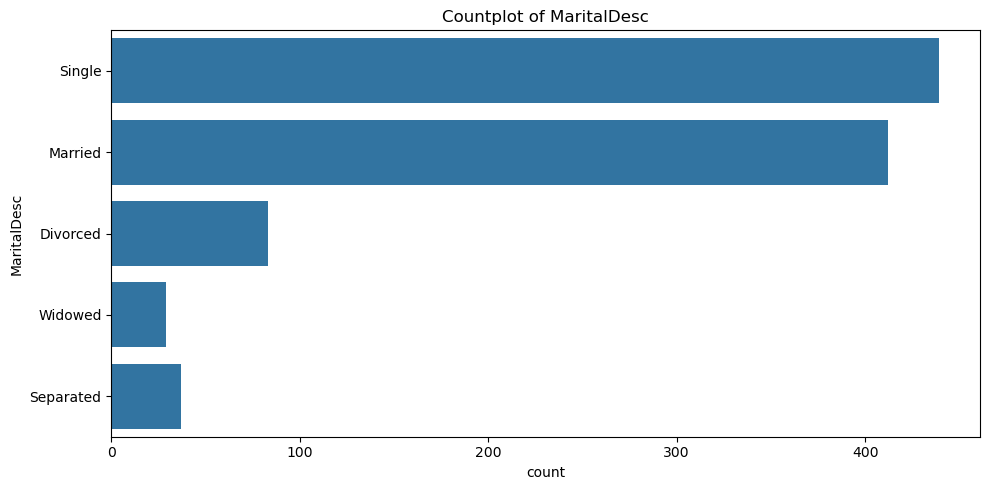

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


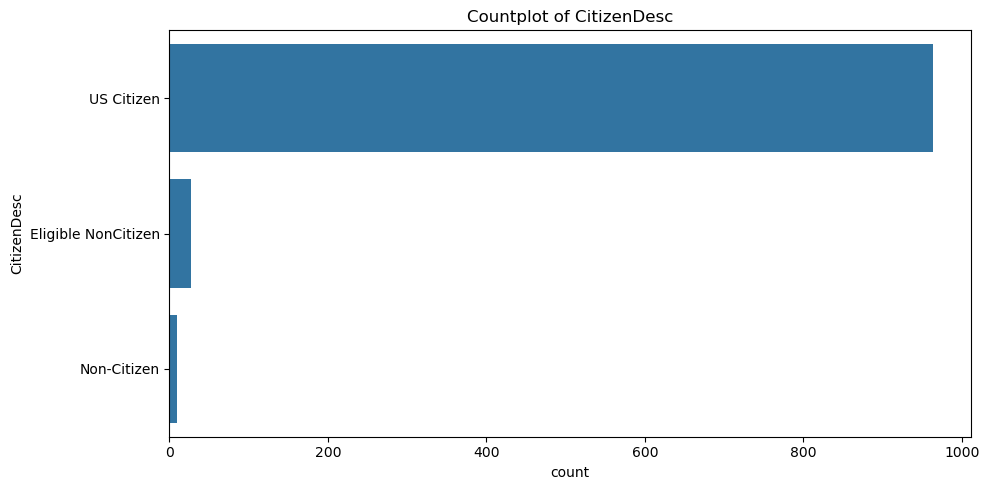

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


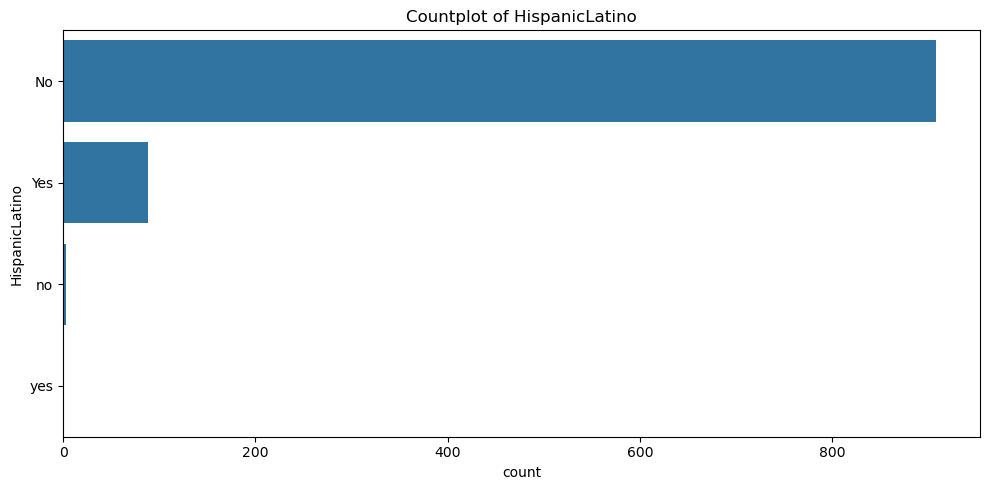

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


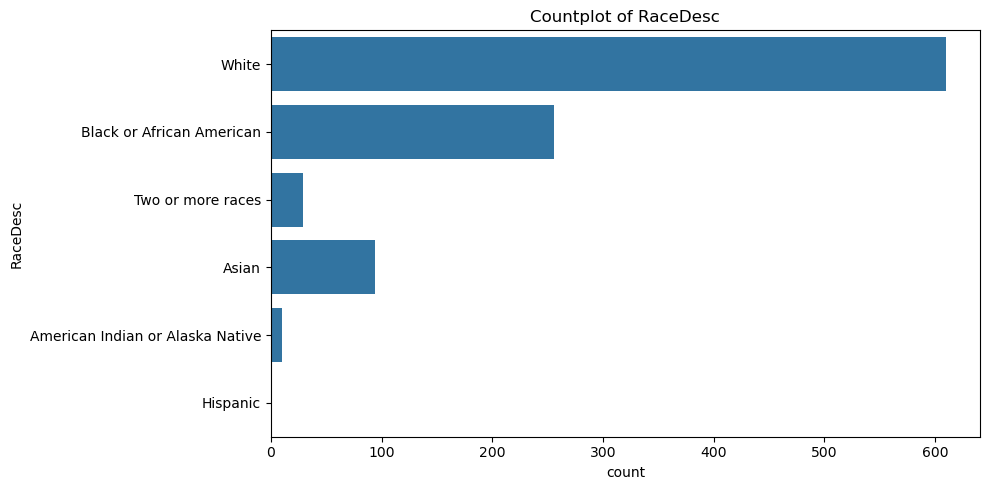

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


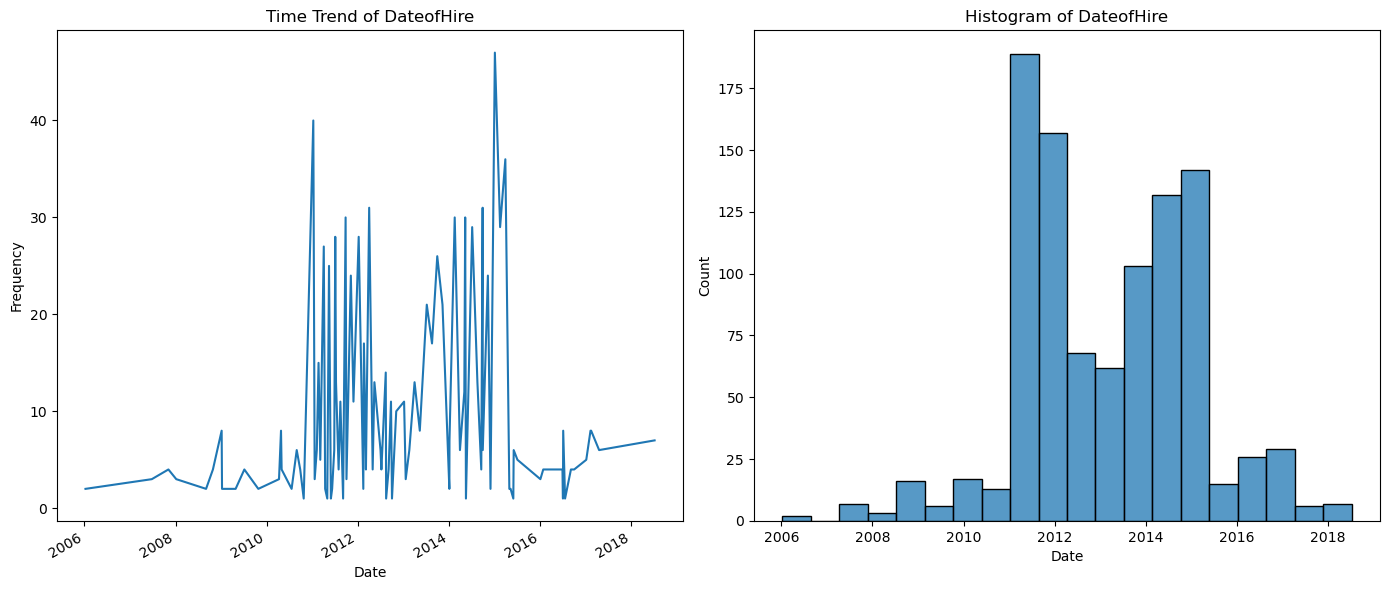

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


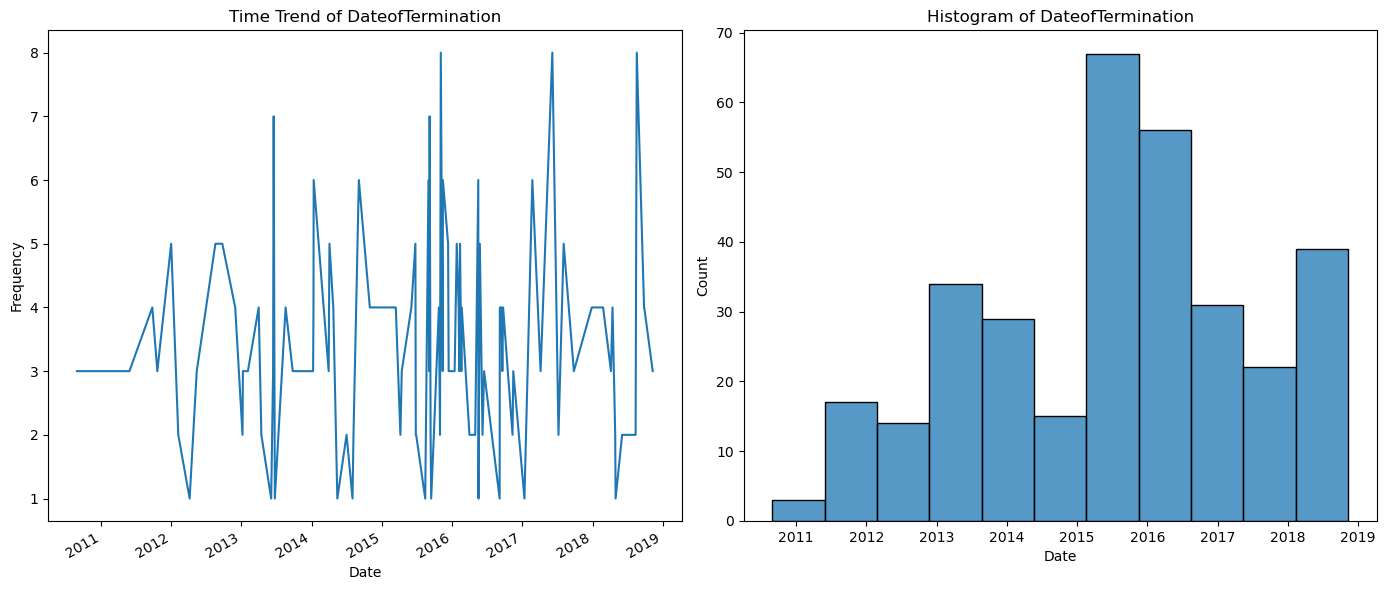

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


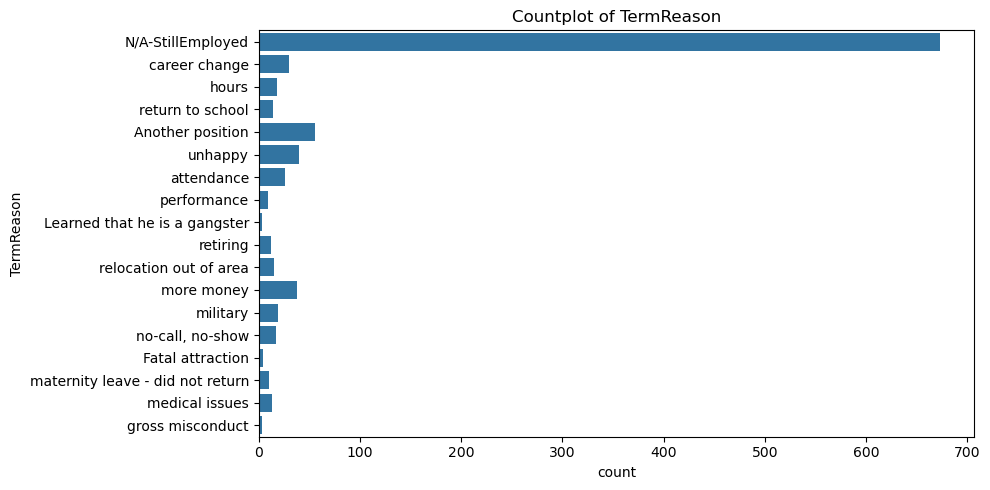

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


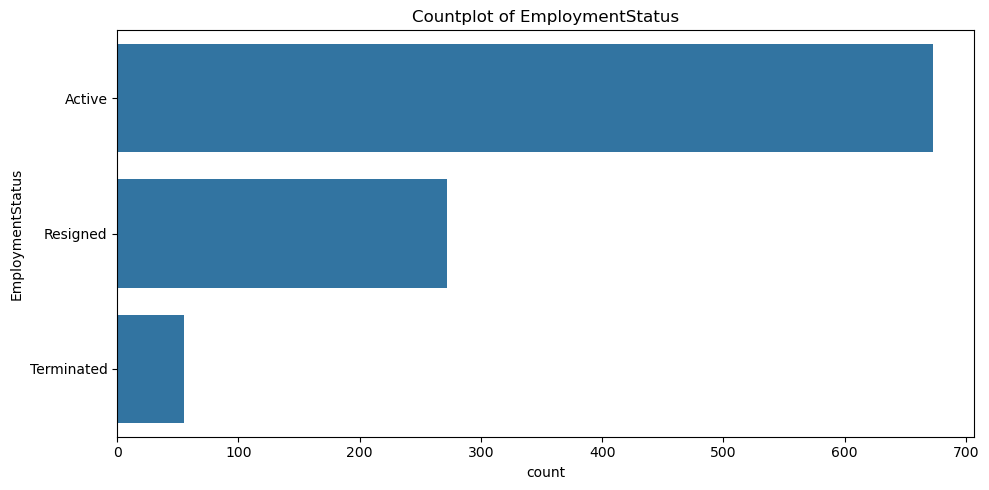

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


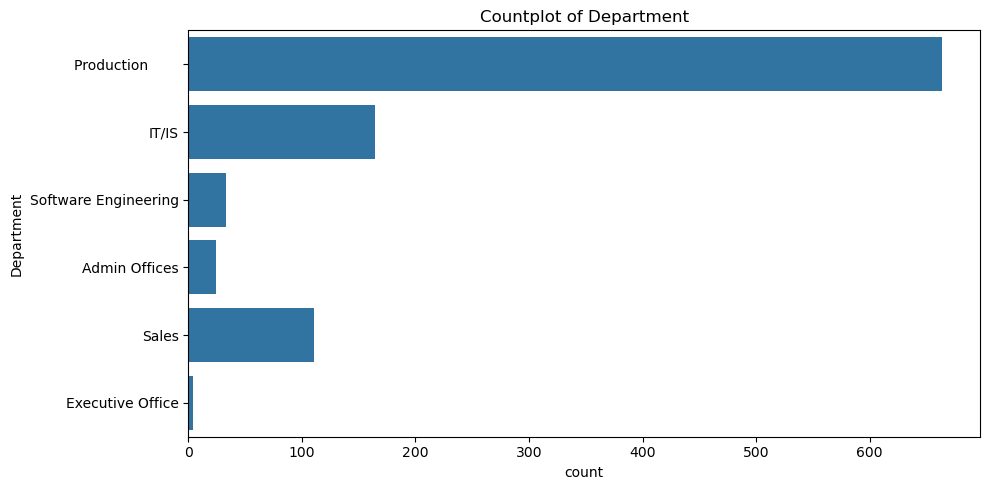

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


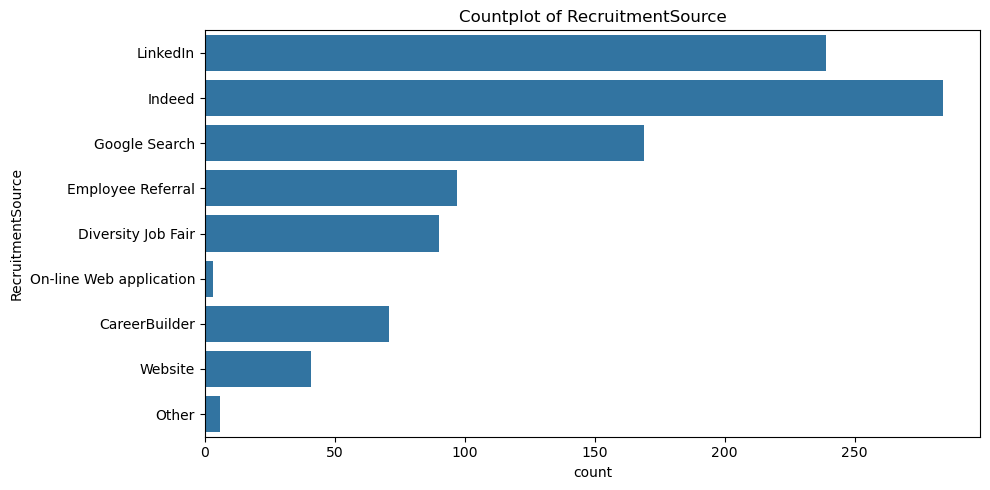

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


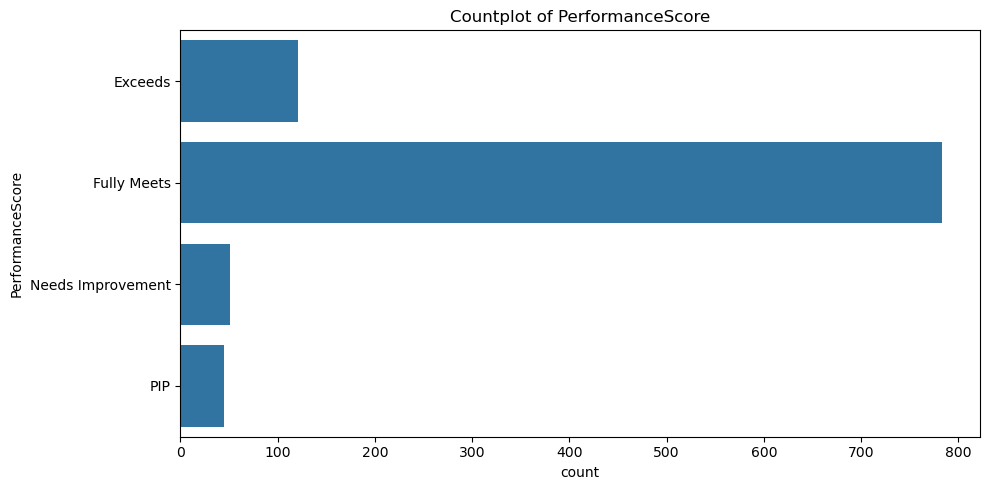

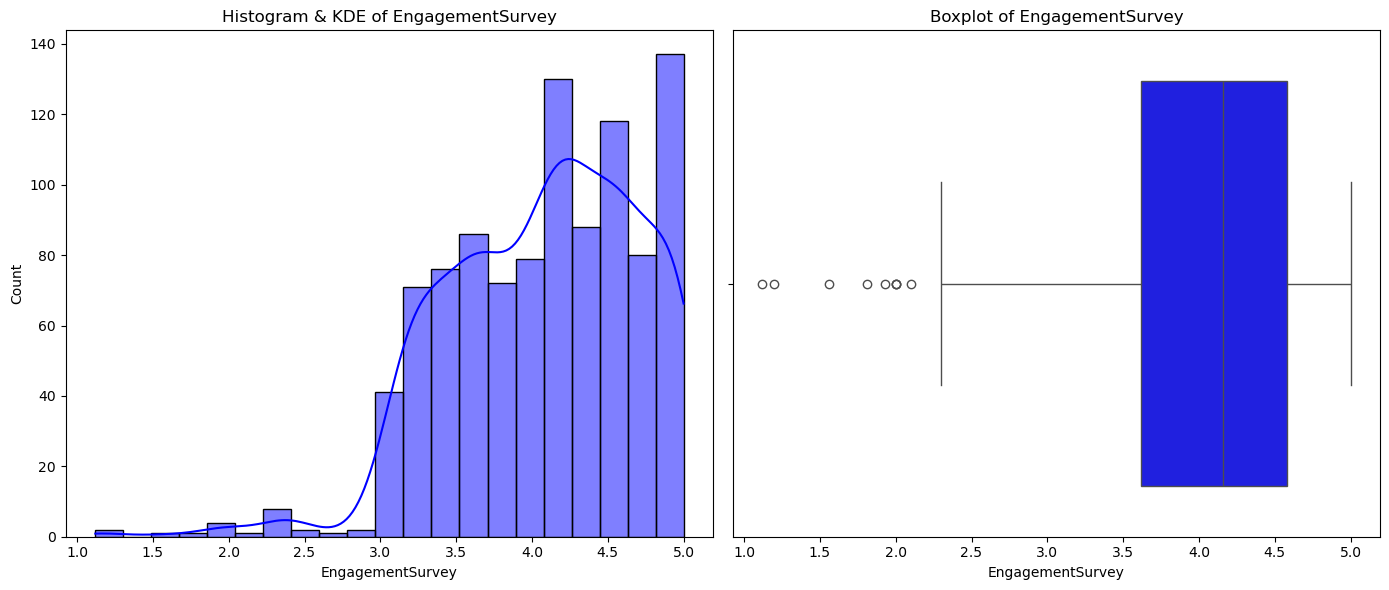

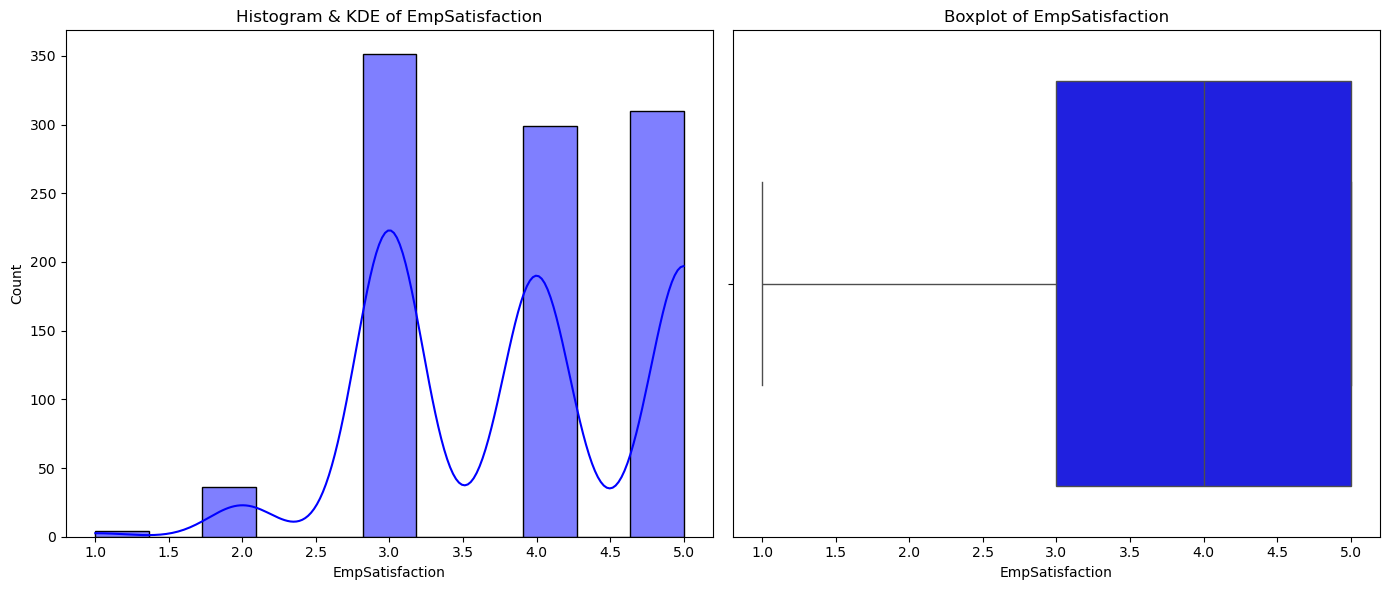

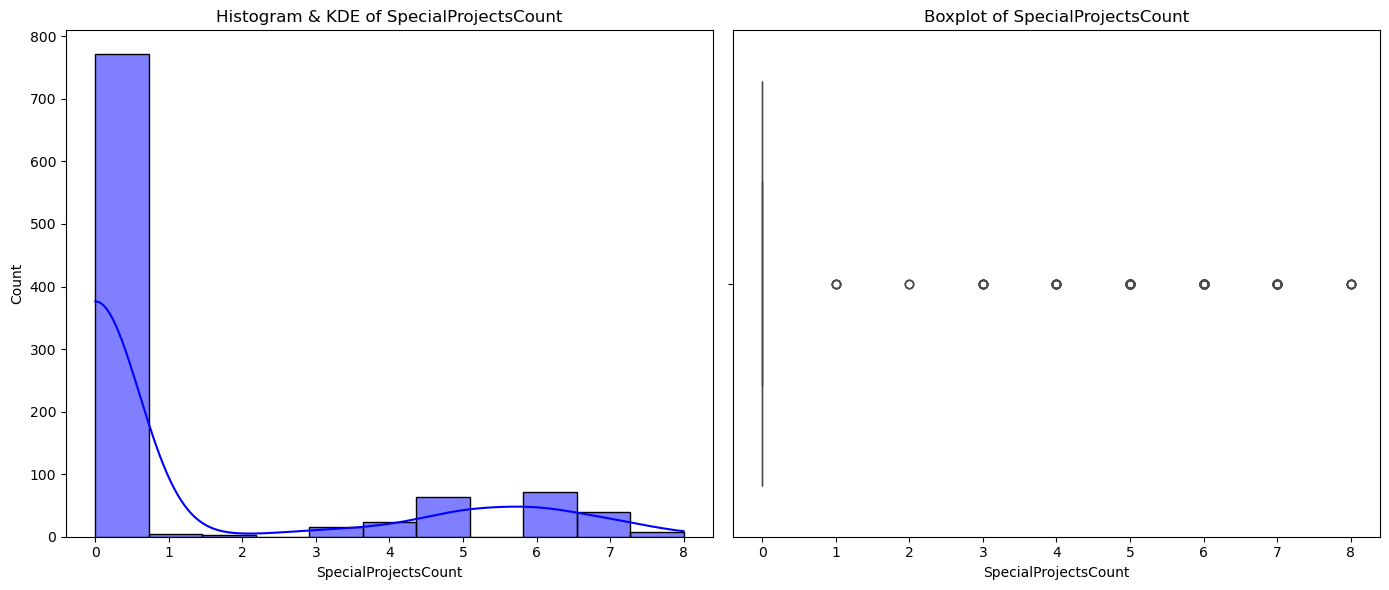

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


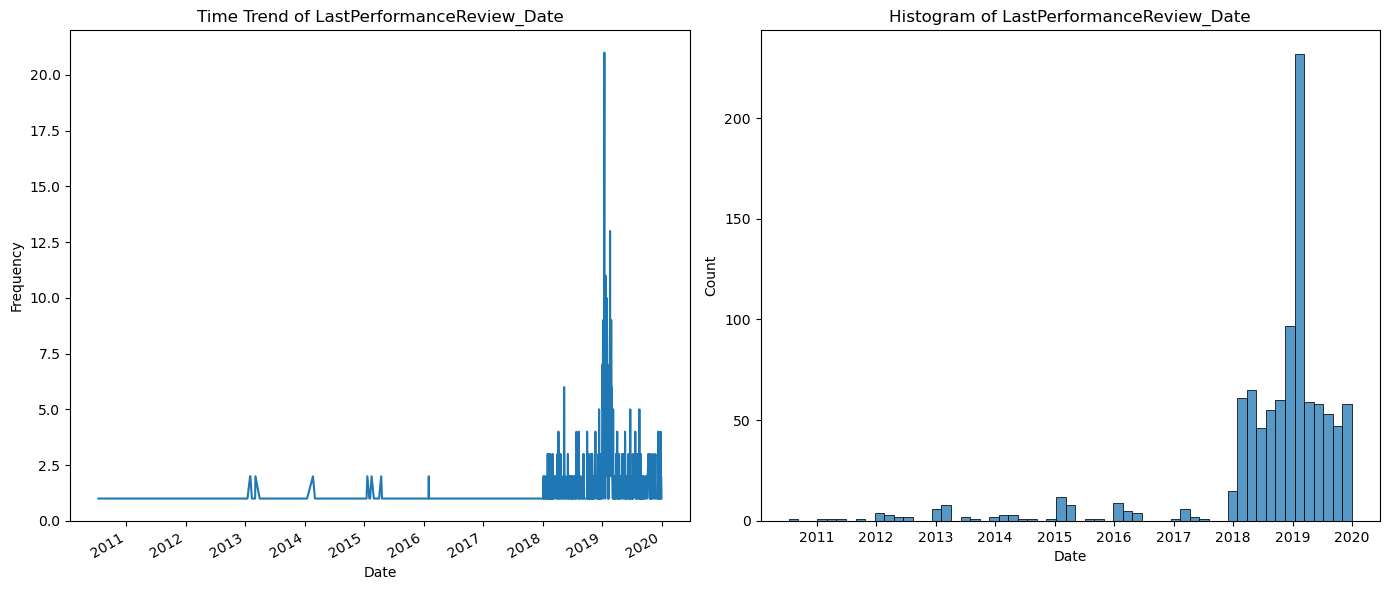

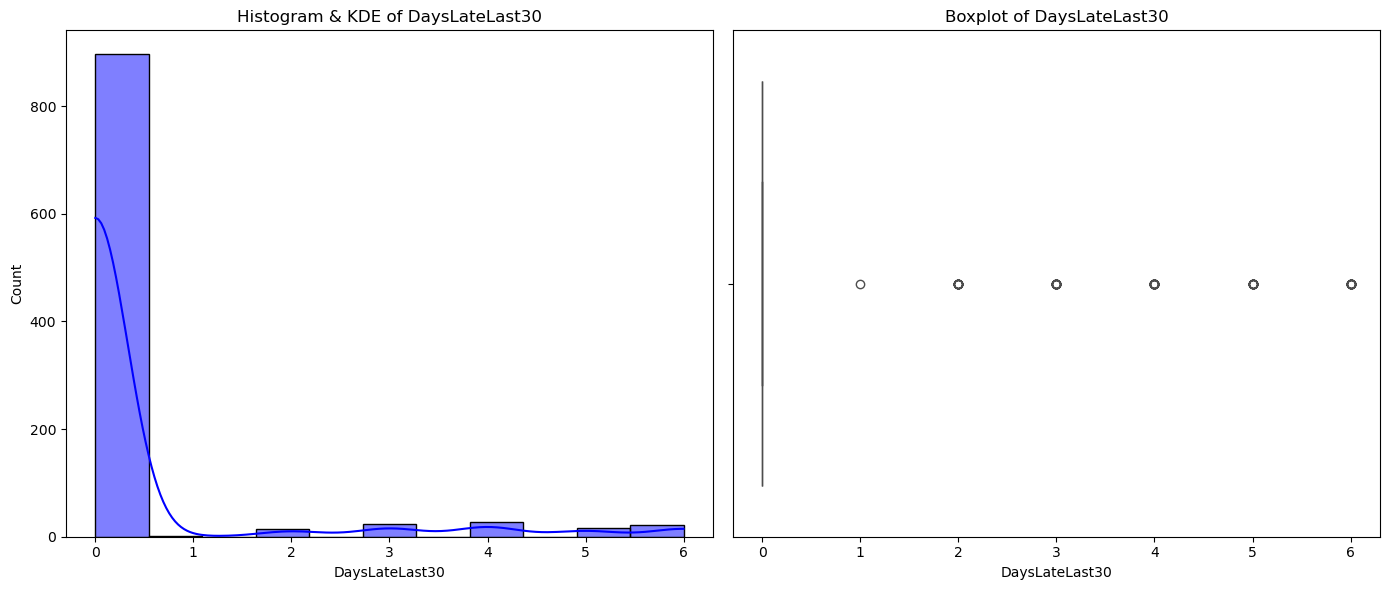

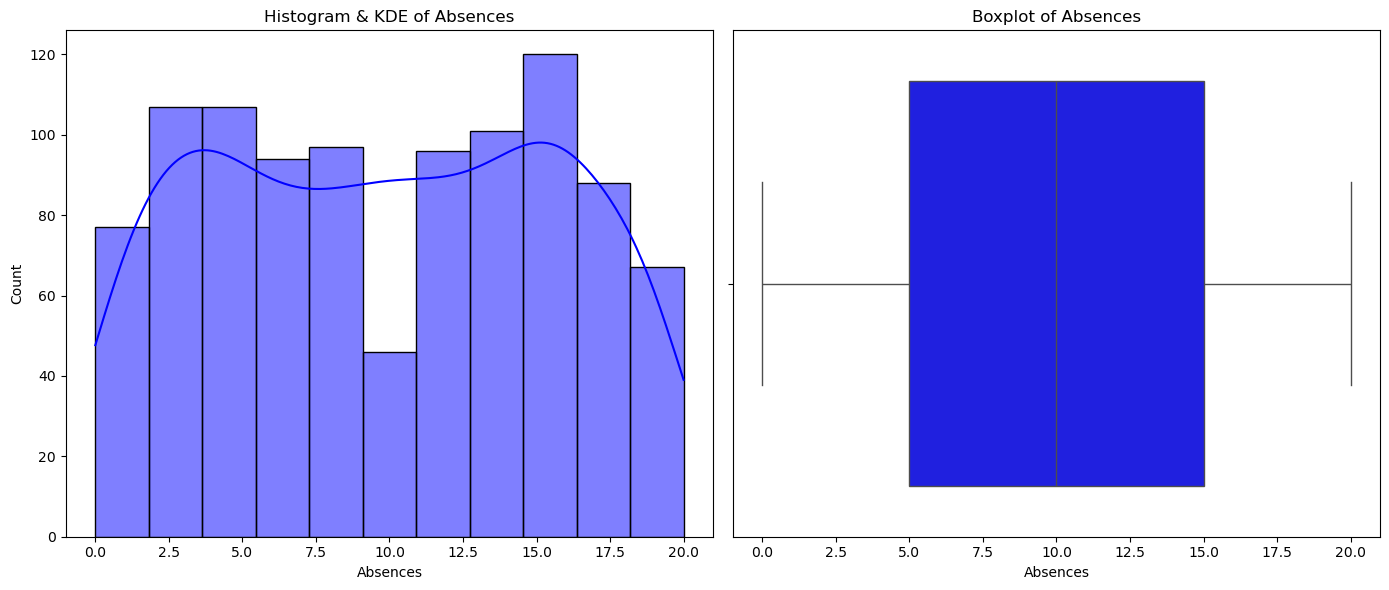

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


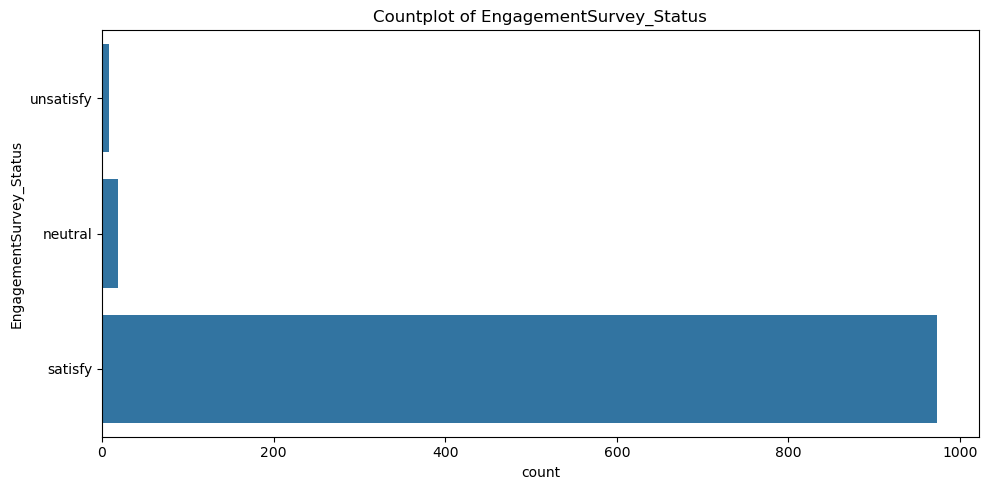

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


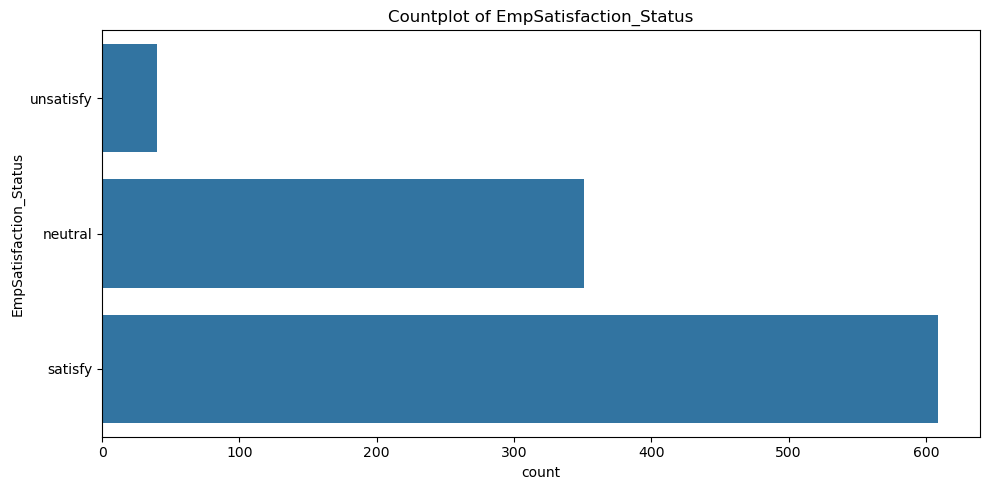

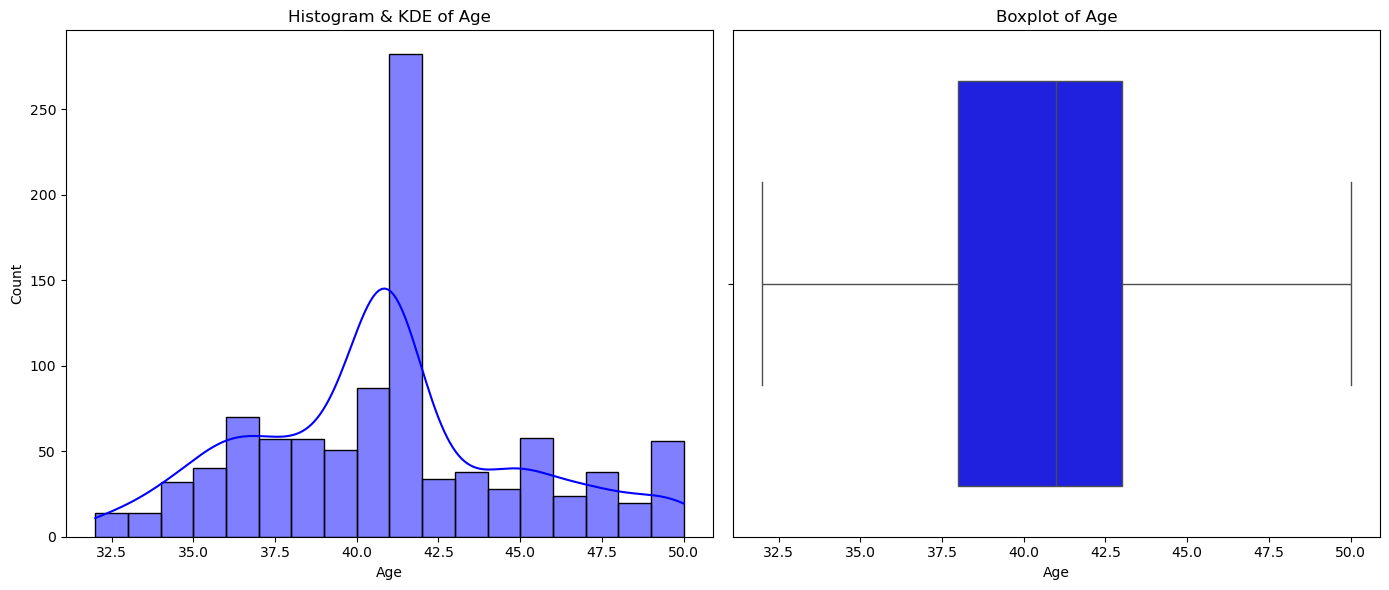

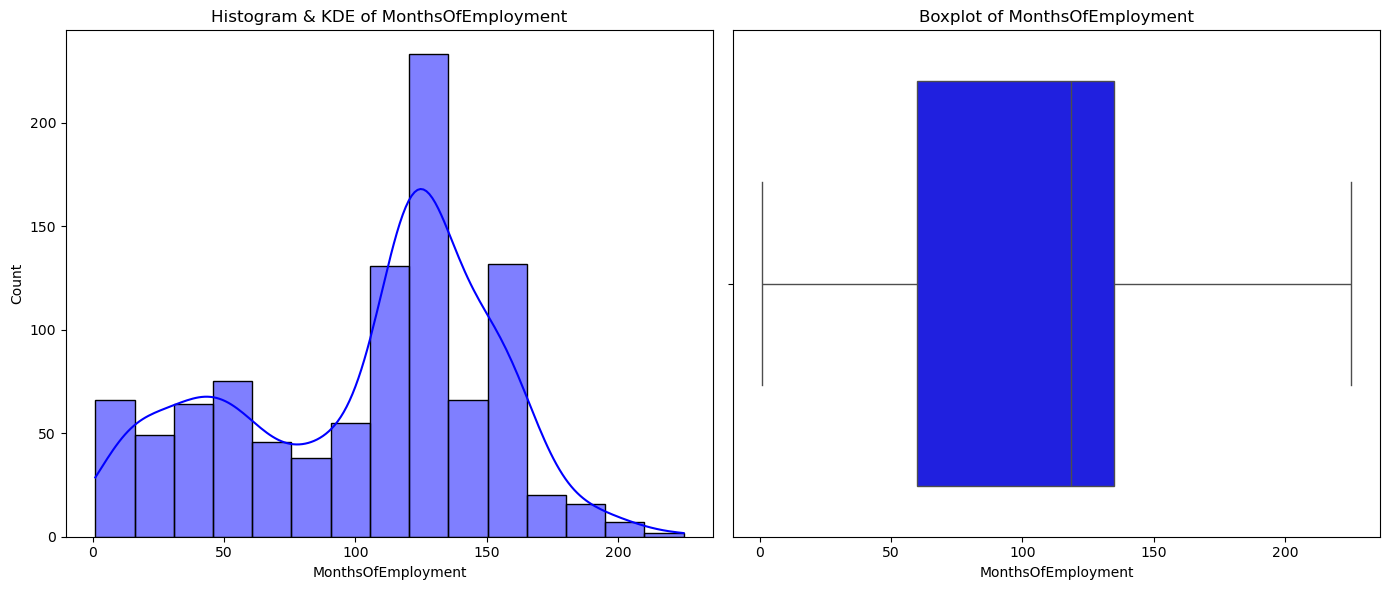

C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, palette=['#1f77b4'] )
C:\Users\OmniaHosny\AppData\Local\Temp\ipykernel_18072\3980164181.py:88: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=data, palette=['#1f77b4'] )


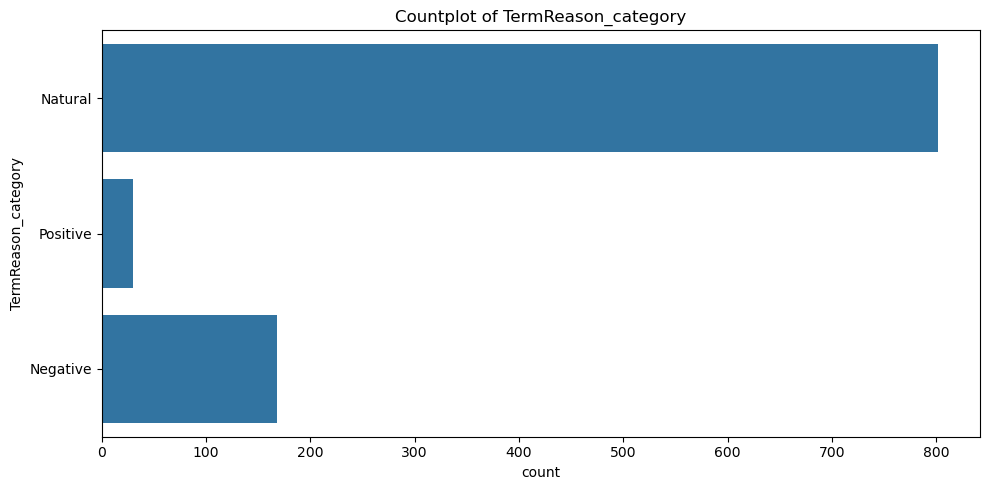

In [34]:
for col in dt.columns:
    univariate_analysis(dt, col, non_analytic_columns=non_analytic_columns, display_plots=True)

Text(0.5, 1.0, 'Absences')

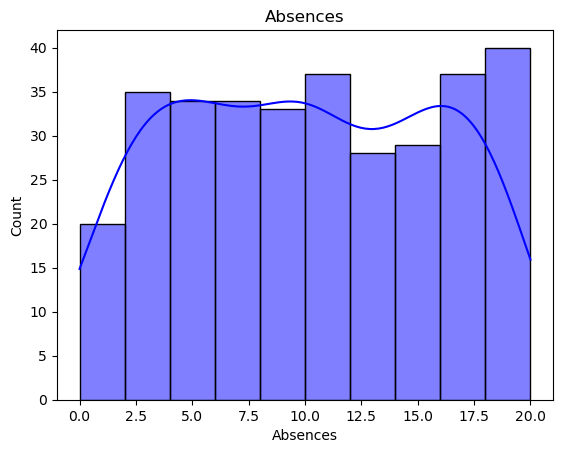

In [35]:
not_active_employees = dt[dt["EmploymentStatus"] != "Active"]

# Count occurrences of each category
count_data = not_active_employees["Absences"].value_counts()

# Sort the categories from greatest to least
sorted_order = count_data.index
sns.histplot(data=not_active_employees, x="Absences", kde=True, color='blue')
plt.title("Absences")

# Multivariate Analysis

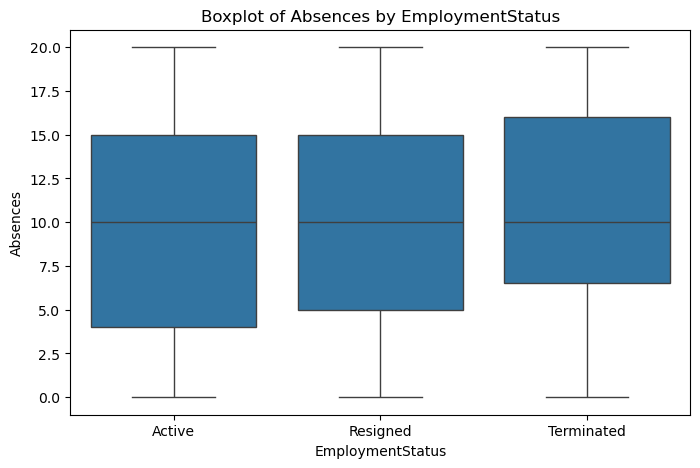

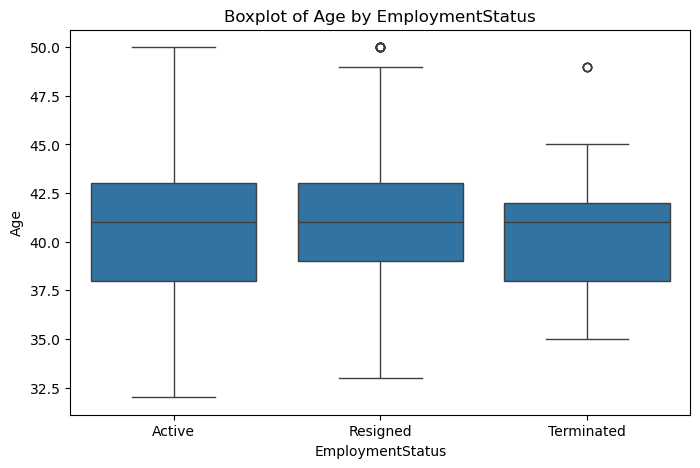

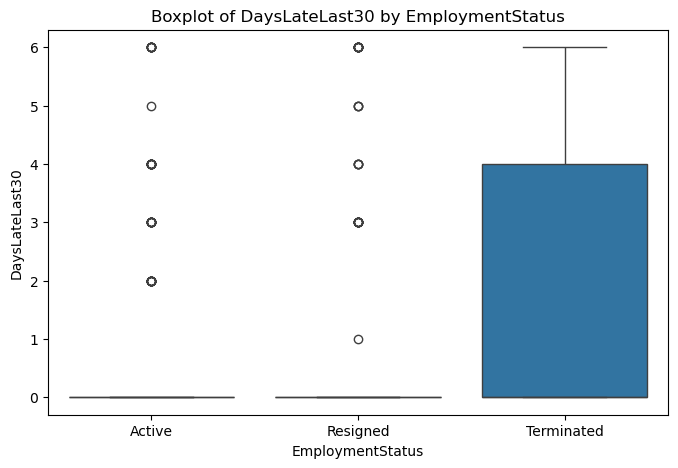

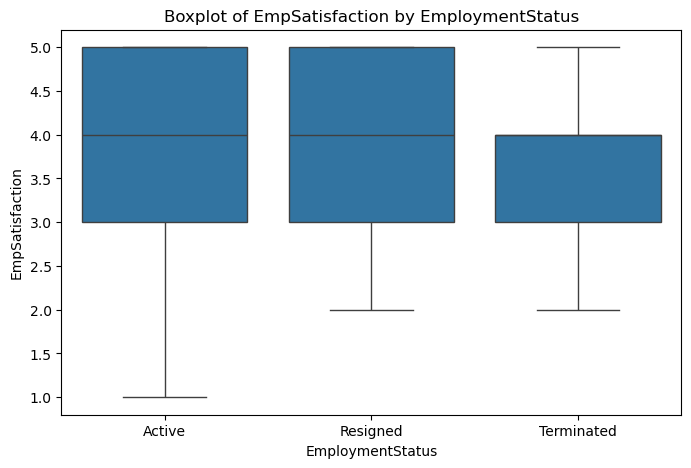

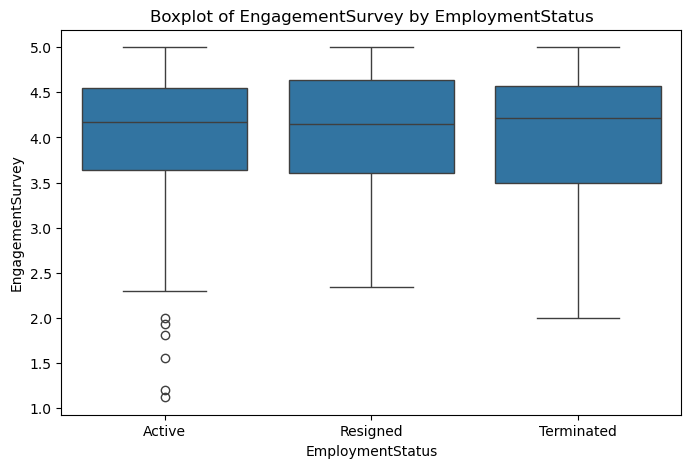

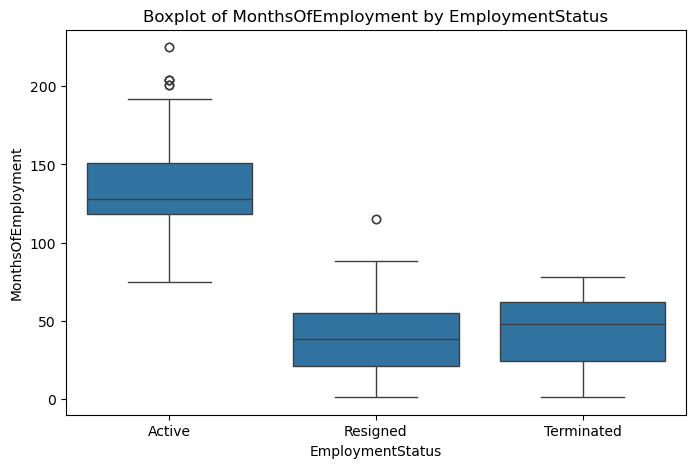

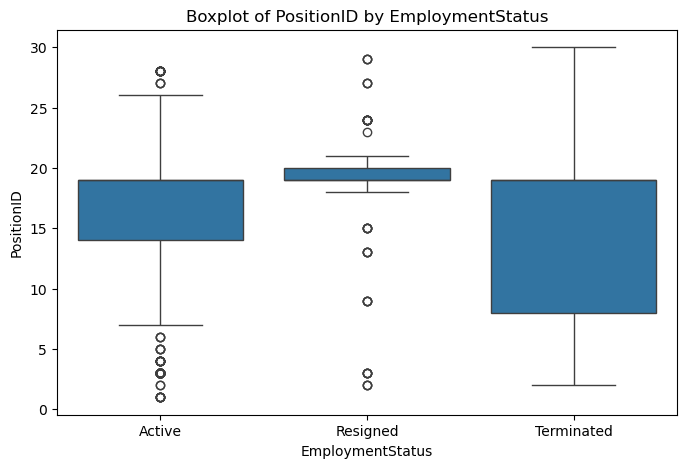

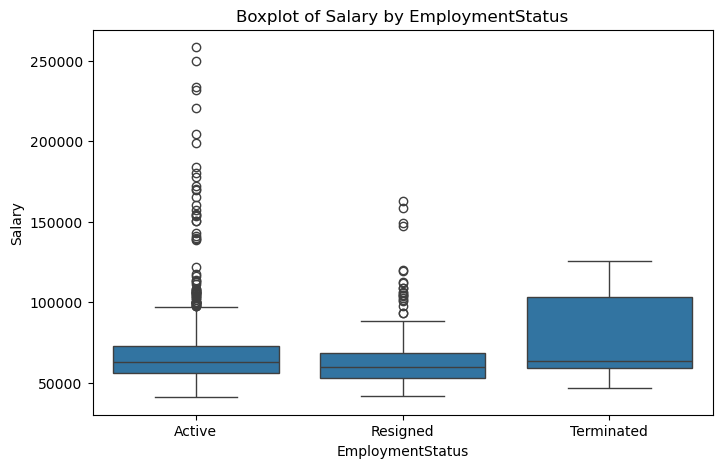

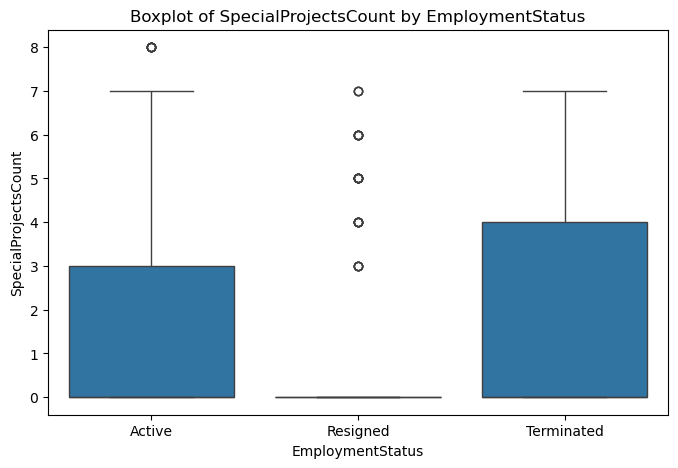

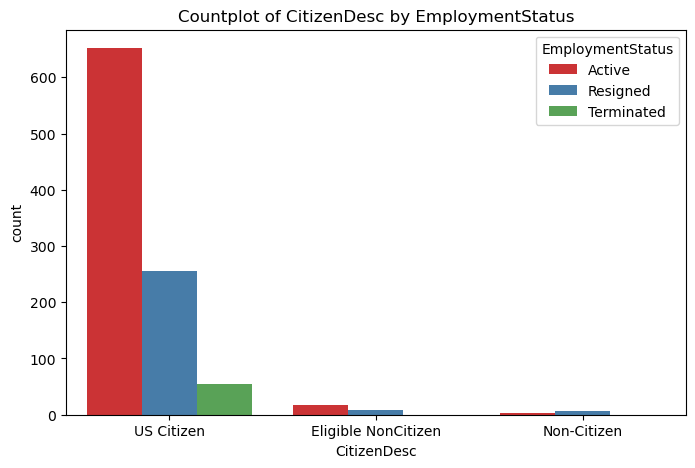

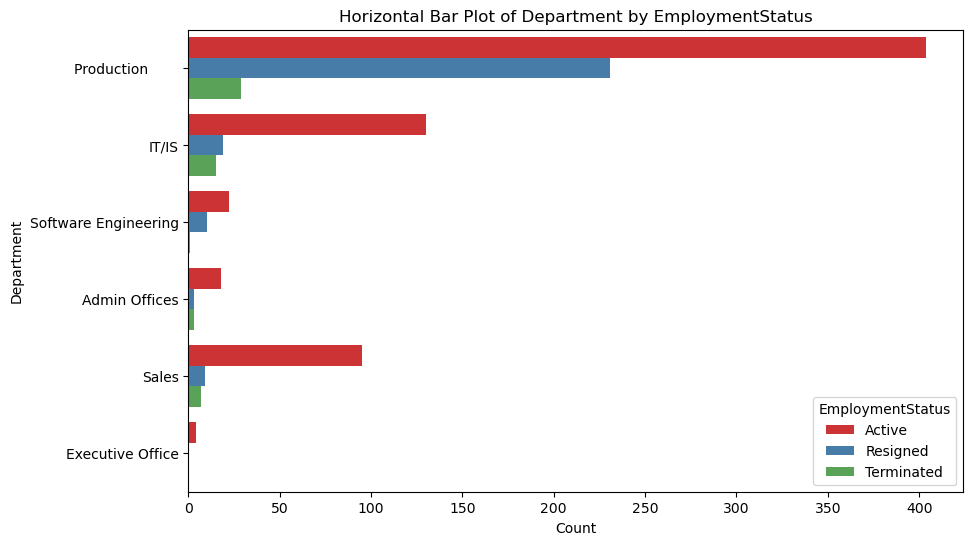

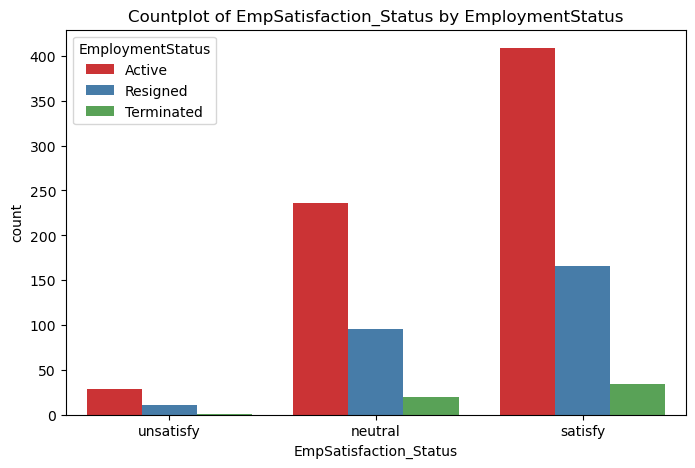

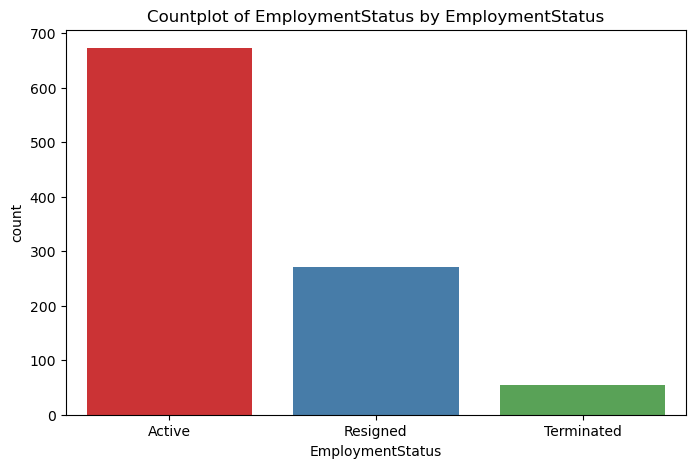

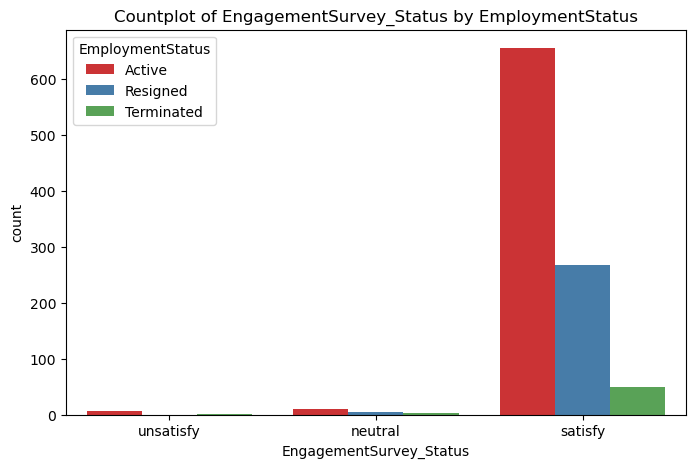

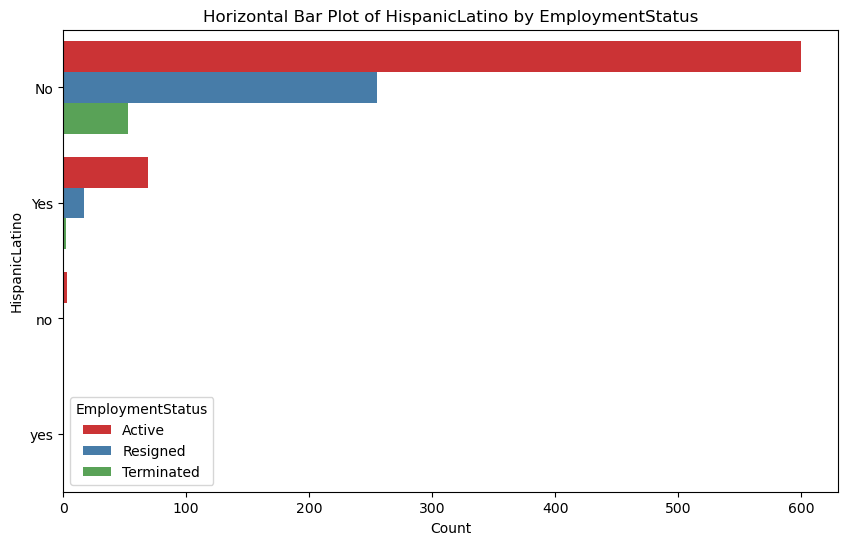

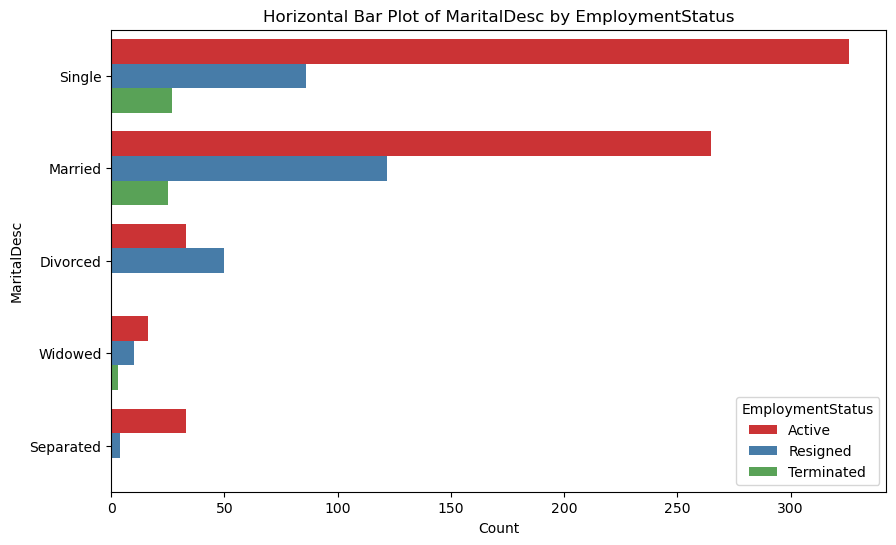

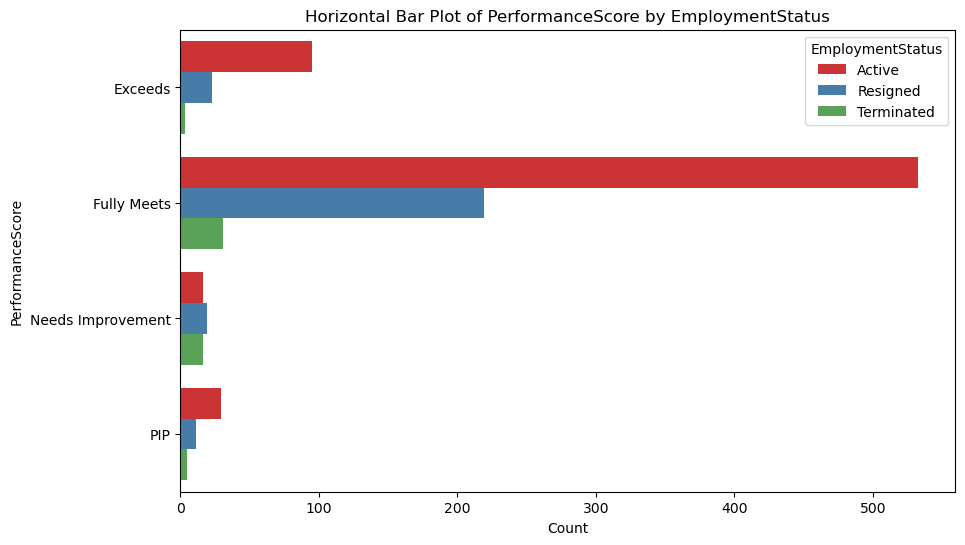

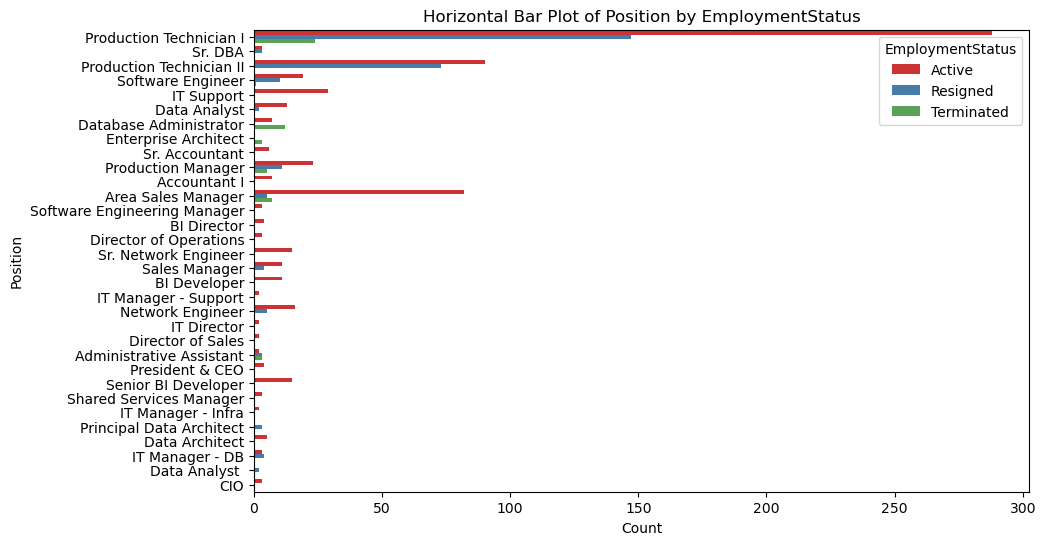

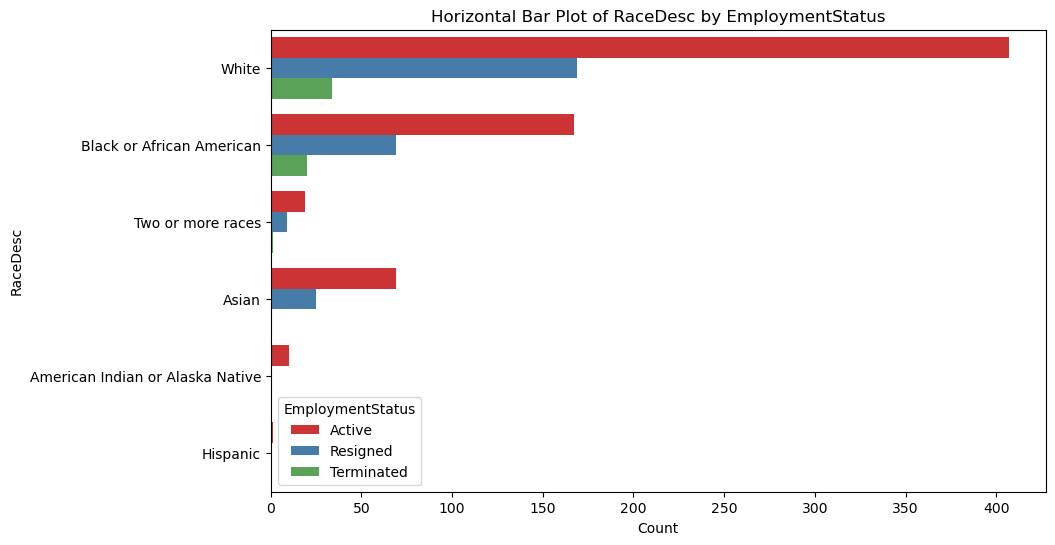

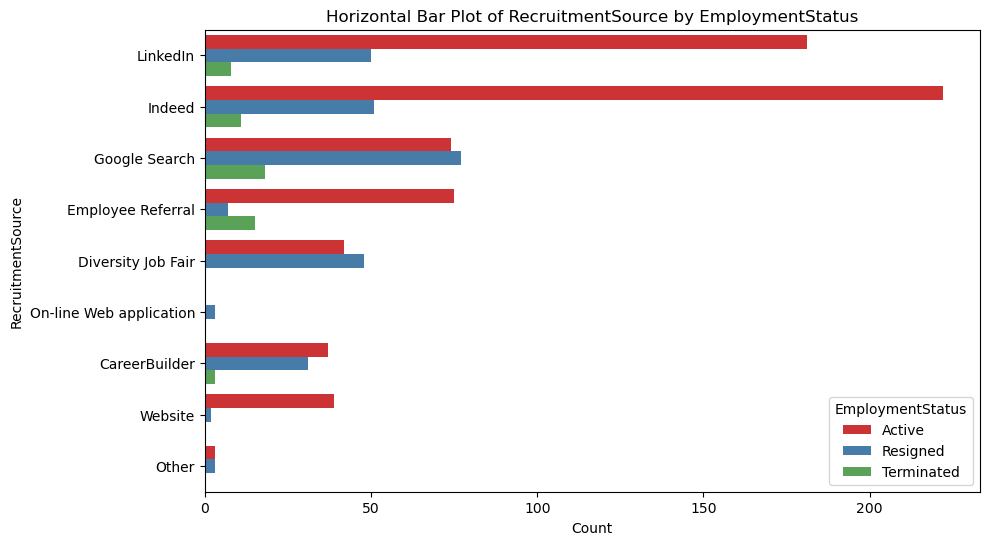

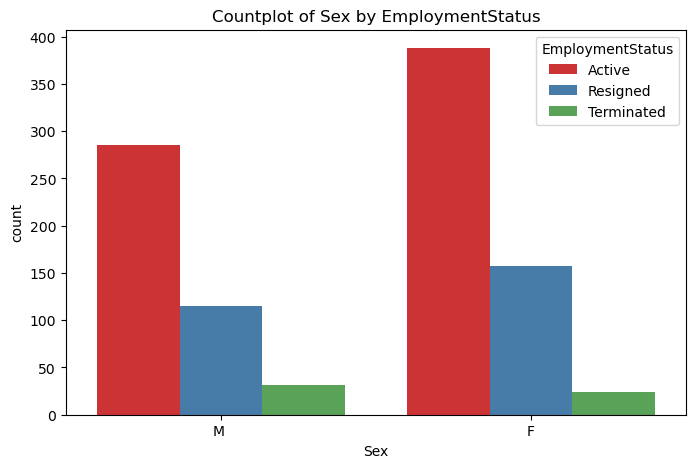

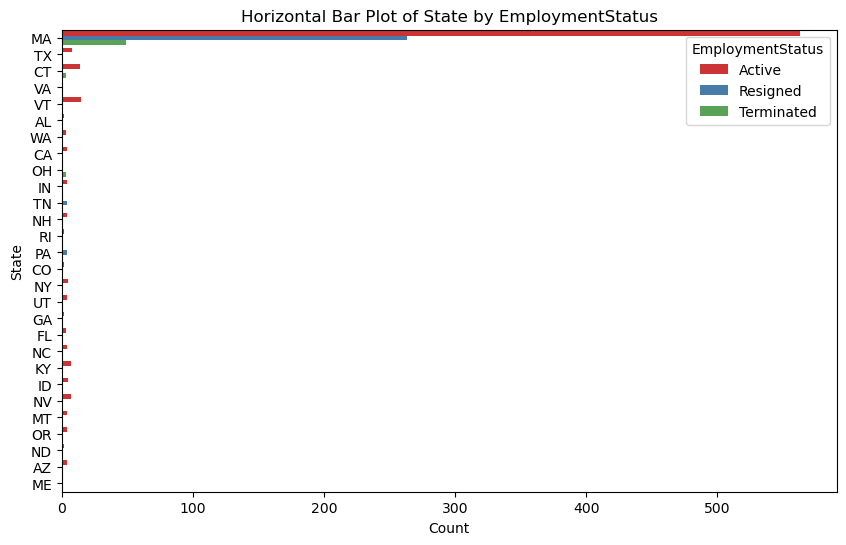

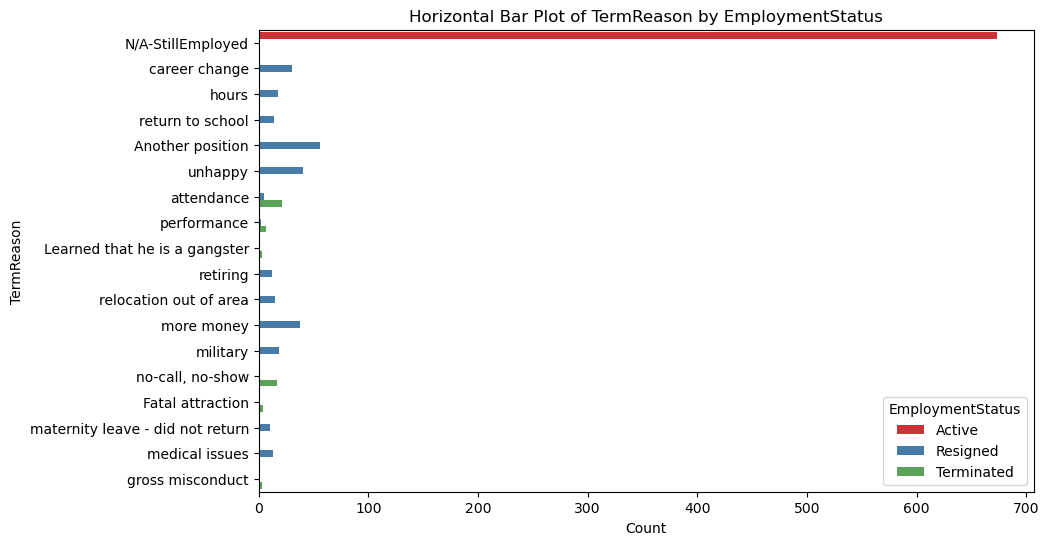

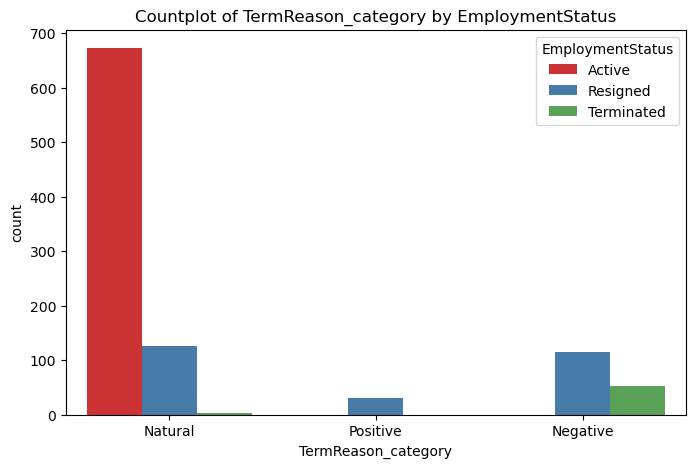

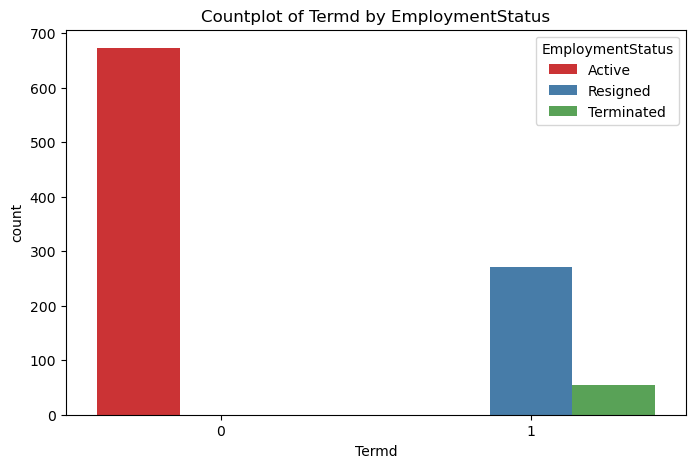

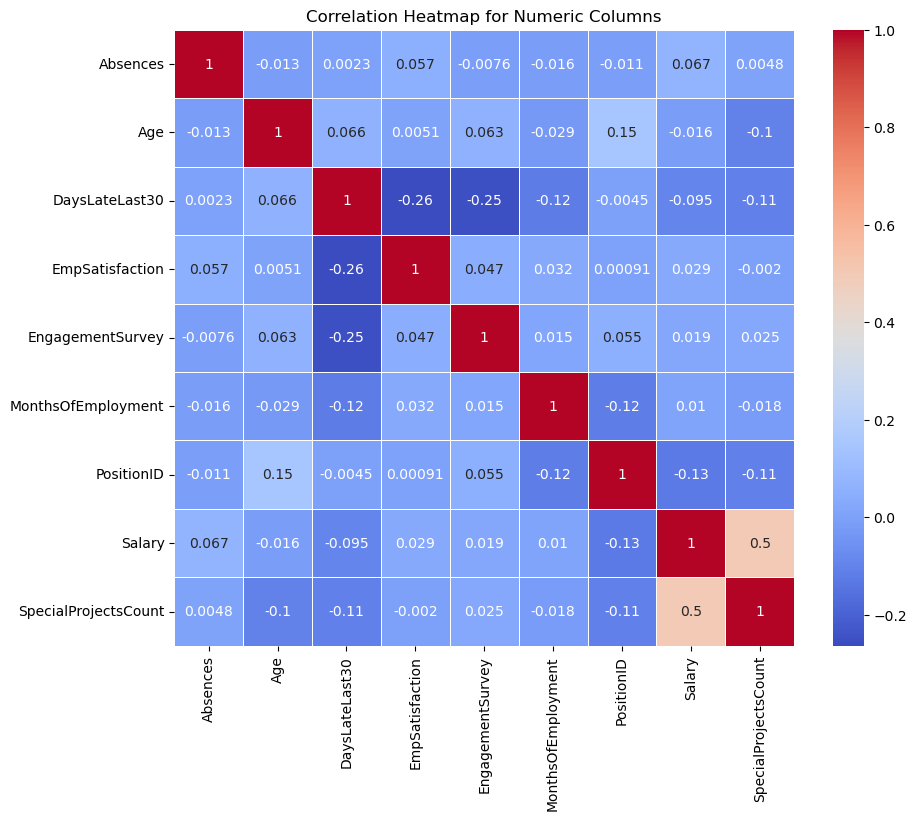

{'numeric_anova': {'Absences': {'f_statistic': 0.5746627613593842,
   'p_value': 0.5630810024557689},
  'Age': {'f_statistic': 1.7394127455413075, 'p_value': 0.17615603298424753},
  'DaysLateLast30': {'f_statistic': 36.84515247625665,
   'p_value': 3.6483553711276425e-16},
  'EmpSatisfaction': {'f_statistic': 0.9185728007779712,
   'p_value': 0.3994256958009209},
  'EngagementSurvey': {'f_statistic': 0.8266530908279344,
   'p_value': 0.43781079533396106},
  'MonthsOfEmployment': {'f_statistic': 1661.0828717330326,
   'p_value': 4.00591e-318},
  'PositionID': {'f_statistic': 23.4075262006929,
   'p_value': 1.1633063090929436e-10},
  'Salary': {'f_statistic': 7.904045046841145,
   'p_value': 0.00039286767060160835},
  'SpecialProjectsCount': {'f_statistic': 16.9364005157353,
   'p_value': 5.845254887562677e-08}},
 'categorical_chi2': {'CitizenDesc': {'chi2_statistic': 11.448212954574927,
   'p_value': 0.021962750352207152},
  'Department': {'chi2_statistic': 69.08275739050454,
   'p_valu

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

def multivariate_analysis(df, target_column='EmploymentStatus', non_analytic_columns=None):
    """
    Perform multivariate analysis between each column in the dataframe and the target column (Employment Status).
    
    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing employee data.
    target_column : str, optional
        The column representing employee status (default is 'EmploymentStatus').
    non_analytic_columns : list, optional
        List of columns that should be skipped from analysis (e.g., ID columns).
    
    Returns:
    --------
    dict
        A dictionary with results of ANOVA for numeric columns and chi-square tests for categorical columns.
    """
    
    non_analytic_columns = non_analytic_columns or []
    results = {'numeric_anova': {}, 'categorical_chi2': {}}
    
    # Ensure the target column is categorical
    df[target_column] = df[target_column].astype('category')
    
    # Separate numeric and categorical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.difference([target_column] + non_analytic_columns)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.difference(non_analytic_columns)
    
    # 1. Numeric columns: Perform ANOVA instead of correlation
    for col in numeric_columns:
        try:
            # Group by the target column (EmploymentStatus) and perform one-way ANOVA
            groups = [df[df[target_column] == status][col].dropna() for status in df[target_column].unique()]
            
            if len(groups) > 1:  # Ensure there are at least two groups for ANOVA
                f_stat, p_value = f_oneway(*groups)
                results['numeric_anova'][col] = {'f_statistic': f_stat, 'p_value': p_value}
            
            # Plot distribution by EmploymentStatus
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=target_column, y=col, data=df)
            plt.title(f'Boxplot of {col} by {target_column}')
            plt.show()

        except Exception as e:
            print(f"Error processing column {col}: {e}")

    # 2. Categorical columns: Chi-square test for independence
    for col in categorical_columns:
        try:
            # Cross-tabulation for chi-square test
            contingency_table = pd.crosstab(df[col], df[target_column])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store chi-square result
            results['categorical_chi2'][col] = {'chi2_statistic': chi2, 'p_value': p}
            
            # Check number of unique values in the column
            unique_values = df[col].nunique()
            
            # If there are more than 3 unique values, use a horizontal bar plot
            if unique_values > 3:
                plt.figure(figsize=(10, 6))
                sns.countplot(y=col, hue=target_column, data=df, palette='Set1')  # Horizontal bar plot
                plt.title(f'Horizontal Bar Plot of {col} by {target_column}')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.show()
            else:
                # Regular count plot for fewer than or equal to 3 unique values
                plt.figure(figsize=(8, 5))
                sns.countplot(x=col, hue=target_column, data=df, palette='Set1')  # Vertical count plot
                plt.title(f'Countplot of {col} by {target_column}')
                plt.show()
        
        except Exception as e:
            print(f"Error processing column {col}: {e}")

    # 3. Correlation heatmap for numeric columns (excluding EmploymentStatus)
    if len(numeric_columns) > 1:
        plt.figure(figsize=(10, 8))
        corr_matrix = df[numeric_columns].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap for Numeric Columns')
        plt.show()

    return results

multivariate_analysis(dt, target_column='EmploymentStatus', non_analytic_columns=non_analytic_columns)

In [38]:
dt.RecruitmentSource.value_counts()

RecruitmentSource
Indeed                     284
LinkedIn                   239
Google Search              169
Employee Referral           97
Diversity Job Fair          90
CareerBuilder               71
Website                     41
Other                        6
On-line Web application      3
Name: count, dtype: int64

## Machine Learning (Forcasting if the employee is terminate or not)
* we use another columns such as 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary',  'Absences', 'Age', 'SpecialProjectsCount','Termd',

Model: Logistic Regression
Accuracy: 0.9900
AUC-ROC: 1.0000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       192
           1       1.00      0.97      0.99       108

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Model: Random Forest
Accuracy: 1.0000
AUC-ROC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       108

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Model: Gradient Boosting
Accuracy: 1.0000
AUC-ROC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       108

    accura

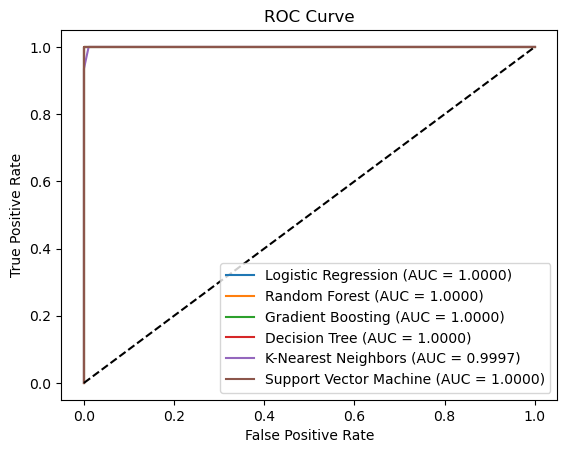


Best model selected based on AUC-ROC score:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MarriedID',
                                                   'MaritalStatusID',
                                                   'GenderID', 'EmpStatusID',
                                                   'DeptID', 'PerfScoreID',
                                                   'FromDiversityJobFairID',
                                                   'Salary', 'Absences', 'Age',
                                                   'SpecialProjectsCount']),
                                                 ('cat', OneHotEncoder(),
                                                  ['RecruitmentSource',
                                                   'TermReason_category'])])),
                ('classifier', LogisticRegression(random_state=42))])


In [40]:
# 1. Load and preprocess the data
def preprocess_data(df):
    # Define numeric and categorical columns
    numeric_columns = ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
                       'FromDiversityJobFairID', 'Salary', 'Absences', 'Age', 'SpecialProjectsCount']
    categorical_columns = ['RecruitmentSource', 'TermReason_category']
    target_column = 'Termd'

    # Separate features and target
    X = df[numeric_columns + categorical_columns]
    y = df[target_column]

    # Define the preprocessing steps for the numeric and categorical data
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder()

    # Use ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    return X, y, preprocessor

# 2. Split the data into training and test sets
def split_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# 3. Define a function to evaluate different classifiers
def evaluate_classifiers(X_train, y_train, X_test, y_test, preprocessor):
    # List of classifiers to test
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(probability=True, random_state=42)
    }
    
    best_model = None
    best_score = 0
    
    for name, model in classifiers.items():
        # Create a pipeline with preprocessing and the classifier
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)
        
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC: {auc:.4f}")
        print(classification_report(y_test, y_pred))
        
        if auc > best_score:
            best_score = auc
            best_model = pipeline
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()
    
    return best_model

# Main function to run the entire pipeline
def main(df):
    # 1. Preprocess the data
    X, y, preprocessor = preprocess_data(df)

    # 2. Split the data into training and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # 3. Evaluate classifiers and choose the best model
    best_model = evaluate_classifiers(X_train, y_train, X_test, y_test, preprocessor)
    
    print("\nBest model selected based on AUC-ROC score:")
    print(best_model)

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your data
main(dt)


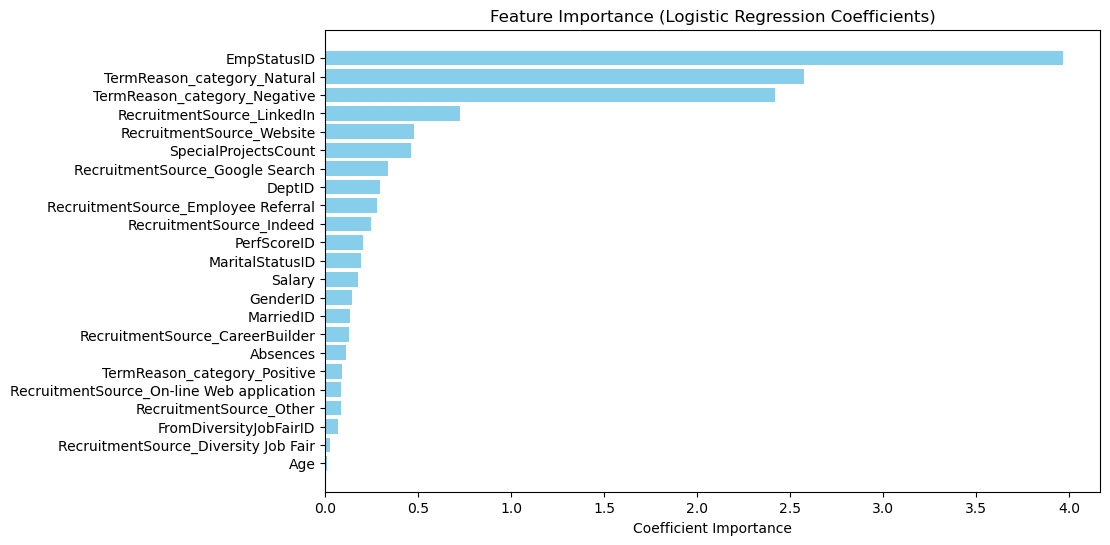


Top Features by Importance:
                                Feature  Coefficient  Importance
3                           EmpStatusID     3.968023    3.968023
20          TermReason_category_Natural    -2.575773    2.575773
21         TermReason_category_Negative     2.416179    2.416179
16           RecruitmentSource_LinkedIn    -0.726202    0.726202
19            RecruitmentSource_Website    -0.475788    0.475788
10                 SpecialProjectsCount    -0.460465    0.460465
14      RecruitmentSource_Google Search     0.335688    0.335688
4                                DeptID    -0.295337    0.295337
13  RecruitmentSource_Employee Referral     0.277659    0.277659
15             RecruitmentSource_Indeed     0.248767    0.248767


In [41]:
# 1. Load and preprocess the data
def preprocess_data(df):
    # Define numeric and categorical columns
    numeric_columns = ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
                       'FromDiversityJobFairID', 'Salary', 'Absences', 'Age', 'SpecialProjectsCount']
    categorical_columns = ['RecruitmentSource', 'TermReason_category']
    target_column = 'Termd'

    # Separate features and target
    X = df[numeric_columns + categorical_columns]
    y = df[target_column]

    # Define the preprocessing steps for the numeric and categorical data
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder()

    # Use ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    return X, y, preprocessor, numeric_columns, categorical_columns

# 2. Split the data into training and test sets
def split_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# 3. Train Logistic Regression and Extract Coefficients
def train_logistic_regression(X_train, y_train, preprocessor, numeric_columns, categorical_columns):
    # Logistic Regression model
    model = LogisticRegression(random_state=42)

    # Create a pipeline that includes preprocessing and the logistic regression model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Extract the logistic regression model from the pipeline
    logistic_model = pipeline.named_steps['classifier']

    # Get feature names from preprocessor
    categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)

    # Combine numeric and categorical feature names
    feature_names = np.concatenate([numeric_columns, categorical_feature_names])

    # Get the coefficients
    coefficients = logistic_model.coef_[0]

    return feature_names, coefficients, logistic_model

# 4. Plot the feature importance based on coefficients
def plot_feature_importance(feature_names, coefficients):
    # Create a DataFrame to hold feature names and their corresponding coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Sort the DataFrame by the absolute value of the coefficients
    feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Coefficient Importance')
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.gca().invert_yaxis()
    plt.show()

    return feature_importance

# Main function to run the feature importance analysis
def main(df):
    # 1. Preprocess the data
    X, y, preprocessor, numeric_columns, categorical_columns = preprocess_data(df)

    # 2. Split the data into training and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # 3. Train the Logistic Regression model and extract feature coefficients
    feature_names, coefficients, model = train_logistic_regression(X_train, y_train, preprocessor, numeric_columns, categorical_columns)

    # 4. Plot and show the feature importance
    feature_importance = plot_feature_importance(feature_names, coefficients)

    print("\nTop Features by Importance:")
    print(feature_importance.head(10))

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your data
main(dt)
